# Guitar chords dataset

## Overview
The Guitar Chords Dataset is a collection of audio recordings of guitar chords played in various ways by different authors and on different types of guitars. The dataset contains chords played in the key of Am, Bb, Bdim, C, Dm, Em, F, and G. The chords are played in four different ways: Up-Down (1), Down-Up (2), Up-Down Down-Up (3), and string by string (4).

## Dataset details
- **Source**: [Kaggle Dataset](https://www.kaggle.com/datasets/fabianavinci/guitar-chords-v2)
- **Versions**: There are multiple versions of the dataset, with differences in the composition of the training and test sets.
    - Version 1-3: Composition of the training and test sets varies.
    - Version 2: Training set consists of recordings from 35 virtual guitars and 10 real guitars. Test set consists of recordings from 10 real guitars.
- **Chords**: The dataset contains recordings of the following chords:
    - Am, Bb, Bdim, C, Dm, Em, F, G
- **Ways of Playing**: Each chord is played in four different ways:
    - Up-Down (1)
    - Down-Up (2)
    - Up-Down Down-Up (3)
    - String by String (4)
- **Guitar Types**: The recordings include performances on 20 different real guitars of various types, including Classical, Acoustic, and Electronic guitars.
- **Synthetic Part**: The dataset also includes a synthetic part created with Garage Band and a plug-in to simulate different sounds.
- **Virtual Guitars**: There are recordings from 35 virtual guitars included in the dataset.

## Potential uses
- Music analysis: The dataset can be used for analyzing and understanding the variations in playing styles and sounds of different guitar chords.
- Machine learning: It can be utilized for training machine learning models to recognize and classify guitar chords played in different ways.
- Music generation: The recordings can serve as a source for creating new music or generating guitar chord progressions.

## Acknowledgements
The dataset is provided by Fabiana Vinci and is available on Kaggle. Special thanks to the contributors for collecting and sharing the recordings.


In [40]:
!pip install librosa matplotlib

In [41]:
!pip install numpy==1.20

In [4]:
import numpy as np

conf = {
    'data_dir' : '/path/to/archive',
    'batch_size': 256,
    'num_epochs': 1000,
    'learning_rate': 0.001,
    'test_size': 0.2,
    'random_state': 42,
    'input_shape': (128, 128, 1),
    'num_classes': 8,
    'sr': 16000,  # Sample rate
    'n_fft': 1024,
    'hop_length': 512,
    'n_mels': 128,
    'bins': np.arange(0, 10000, 100)
}

In [8]:
import matplotlib.pyplot as plt

import numpy as np
import os
import pickle
import librosa.display
import librosa

# function to load and sort audio files from directory
def load_data_from_directory(directory):
    data_directory = {}
    for chord in os.listdir(directory):
        if 'DS_Store' not in chord:
            data_directory[chord] = sorted(
                [os.path.join(directory, chord, file) for file in os.listdir(os.path.join(directory, chord))]
            )
    return data_directory

In [9]:
def extract_features(file_paths):
    features = []
    for file_path in file_paths:
        y, sr = librosa.load(file_path, sr=None)
        S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
        log_S = librosa.power_to_db(S, ref=np.max)
        features.append(log_S)
    return features


In [10]:
# frepare the dataset from features
def prepare_dataset(features, labels_dict):
    X = []
    y = []
    for feature, label in zip(features, labels_dict.keys()):
        temp_spec = np.full(conf['input_shape'], -80)
        temp_spec[:, :feature.shape[1], 0] = feature[:, :128]
        X.append(temp_spec)
        y.append(labels_dict[label])
    return np.array(X), np.array(y)

In [12]:
def check_directory_contents(directory):
    for root, dirs, files in os.walk(directory, topdown=True):
        print(f"Directory: {root}")
        # filter out .DS_Store files from the list of files
        filtered_files = [file for file in files if file != '.DS_Store']
        print(f"Contains {len(filtered_files)} files")

check_directory_contents(conf['data_dir'])

In [14]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def plot_multiple_spectrograms(train_directory, train_labels):
    num_chords = len(train_labels)
    fig, axes = plt.subplots(nrows=num_chords//2 + num_chords%2, ncols=2, figsize=(18, num_chords * 4), dpi=400, facecolor='w', edgecolor='k')
    axes = axes.flatten()

    for c, label in enumerate(train_labels):
        audio, sample_rate = librosa.load(train_directory[label][0])
        tmp_stft = np.abs(librosa.stft(audio))
        librosa.display.specshow(tmp_stft, sr=sample_rate, ax=axes[c], y_axis='log', x_axis='time', cmap='magma')
        axes[c].set_title(f'Chord: {label}', fontsize=14)
        axes[c].set_xlabel('Time (s)', fontsize=12)
        axes[c].set_ylabel('Frequency (Hz)', fontsize=12)
        plt.colorbar(librosa.display.specshow(tmp_stft, sr=sample_rate, ax=axes[c], y_axis='log', x_axis='time', cmap='magma'), ax=axes[c], format='%+2.0f dB')
        axes[c].grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.suptitle('Spectrograms (STFT) of Guitar Chords', fontsize=18, fontweight='bold')
    plt.show()

# Exploratory Data Analysis (EDA)

{('Am', 'Test'): 40, ('Bb', 'Test'): 40, ('Em', 'Test'): 40, ('G', 'Test'): 40, ('F', 'Test'): 40, ('Dm', 'Test'): 40, ('C', 'Test'): 40, ('Bdim', 'Test'): 40, ('Am', 'Training'): 180, ('Bb', 'Training'): 180, ('Em', 'Training'): 180, ('G', 'Training'): 180, ('F', 'Training'): 180, ('Dm', 'Training'): 180, ('C', 'Training'): 180, ('Bdim', 'Training'): 180}


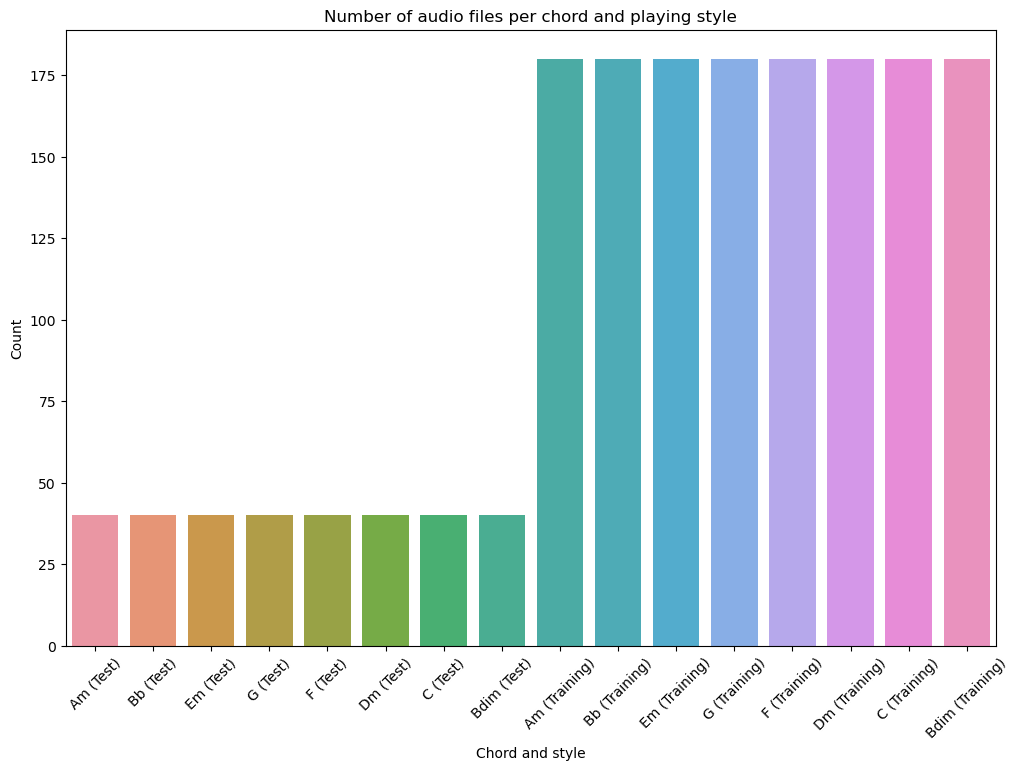

In [15]:
import os
import librosa
import matplotlib.pyplot as plt
import seaborn as sns

# Function to load and categorize files
def load_and_categorize_files(directory):
    file_categories = {}
    for subdir, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.wav'):  # assuming the files are in .wav format
                path = os.path.join(subdir, file)
                parts = path.split(os.sep)
                chord = parts[-2]
                style = parts[-3]
                key = (chord, style)
                if key in file_categories:
                    file_categories[key].append(path)
                else:
                    file_categories[key] = [path]
    return file_categories

# Load data

data = load_and_categorize_files(conf['data_dir'])

# Count the number of files for each chord and style
counts = {key: len(paths) for key, paths in data.items()}
print(counts)

# Visualize the counts
labels = [f"{key[0]} ({key[1]})" for key in counts.keys()]
values = counts.values()

plt.figure(figsize=(12, 8))
sns.barplot(x=labels, y=list(values))
plt.xticks(rotation=45)
plt.title('Number of audio files per chord and playing style')
plt.xlabel('Chord and style')
plt.ylabel('Count')
plt.show()

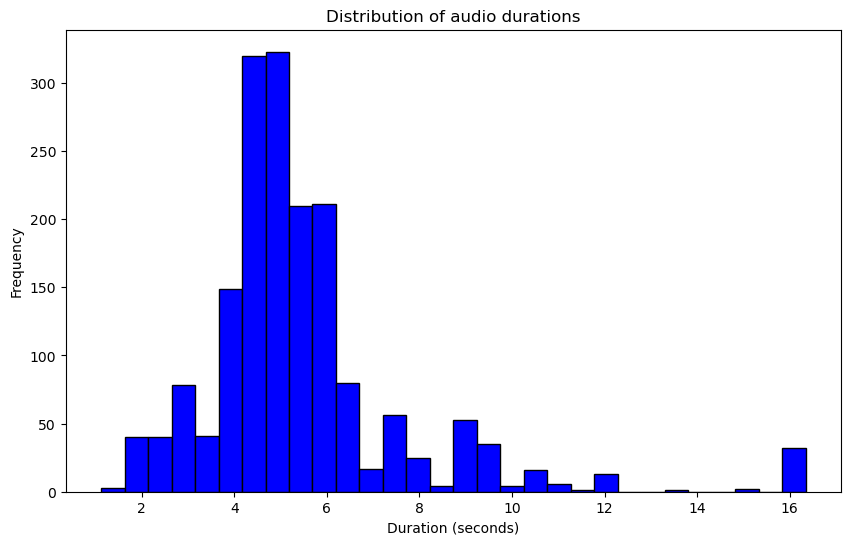

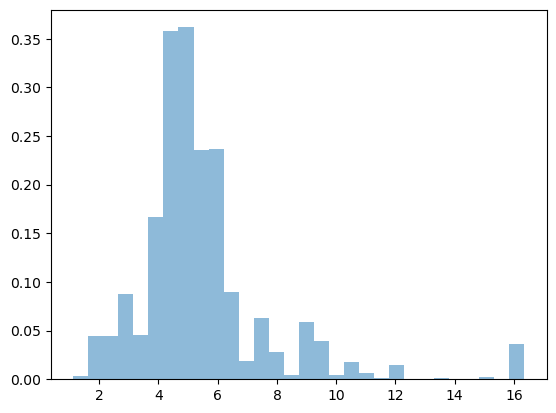

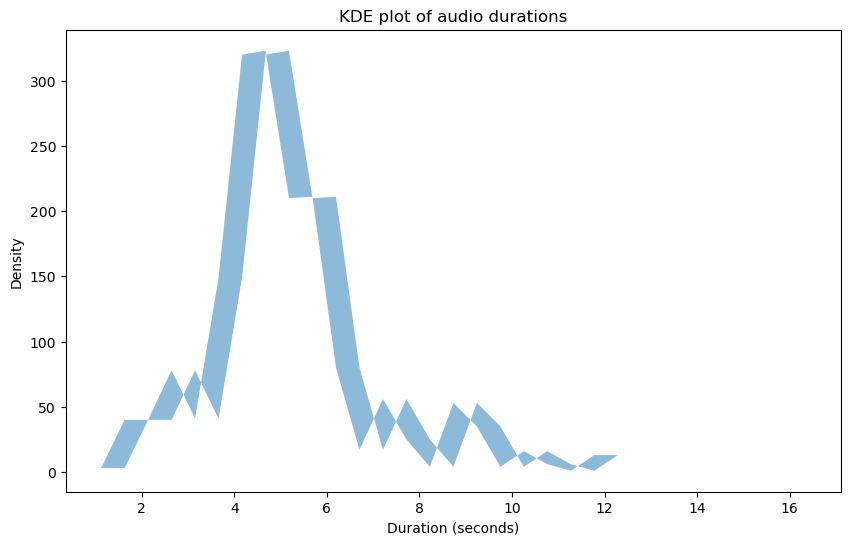

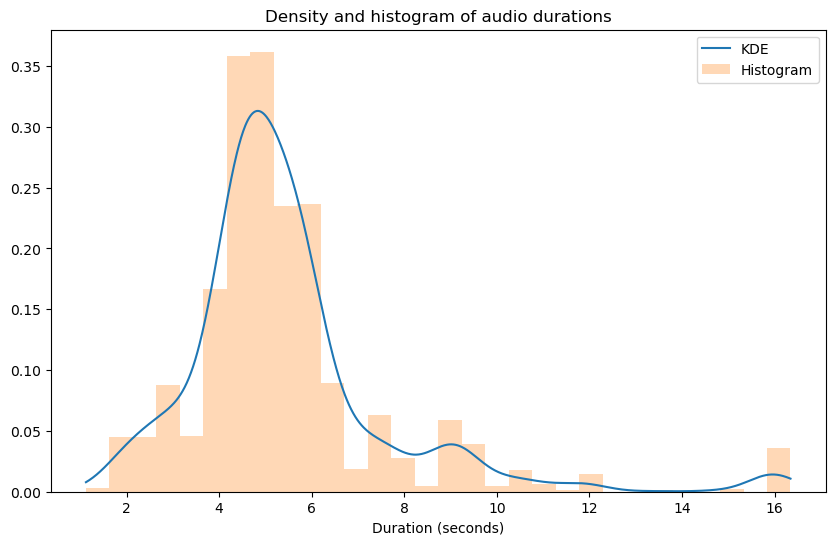

In [16]:
# Calculate the duration of each audio file
durations = []
for paths in data.values():
    for path in paths:
        duration = librosa.get_duration(path=path)  # Changed from filename=path to path=path
        durations.append(duration)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(durations, bins=30, color='blue', edgecolor='black')
plt.title('Distribution of audio durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

import numpy as np

density, bins, _ = plt.hist(durations, bins=30, density=True, alpha=0.5)
count, _ = np.histogram(durations, bins)
cum_density = np.cumsum(density * np.diff(bins))

plt.figure(figsize=(10, 6))
plt.fill_betweenx(count, bins[:-1], bins[1:], density, alpha=0.5)
plt.title('KDE plot of audio durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Density')
plt.show()


from scipy.stats import gaussian_kde

# Compute densities
density = gaussian_kde(durations)

# Plotting
x = np.linspace(min(durations), max(durations), 1000)
plt.figure(figsize=(10, 6))
plt.plot(x, density(x), label='KDE')
plt.hist(durations, bins=30, density=True, alpha=0.3, label='Histogram')
plt.title('Density and histogram of audio durations')
plt.xlabel('Duration (seconds)')
plt.legend()
plt.show()

# Expanded feature extraction implementation

First, enhance the feature extraction function to include MFCCs, Chroma features, and Spectral Contrast. These features capture different aspects of the audio data that are crucial for identifying nuances between chords played on various guitars.

In [18]:
import librosa
import numpy as np

def extract_features(file_paths):
    all_features = []
    for file_path in file_paths:
        y, sr = librosa.load(file_path, sr=None)  # Load the audio file
        mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
        log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        chroma = librosa.feature.chroma_stft(y=y, sr=sr)
        spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)

        features = {
            'mel_spectrogram': log_mel_spec,
            'mfcc': mfcc,
            'chroma': chroma,
            'spectral_contrast': spectral_contrast
        }
        all_features.append(features)
    return all_features

## Statistical analysis of features

With these additional features extracted, the next step is to analyze their mean, variance, and correlations to determine how they vary by chord and guitar type.

In [19]:
def truncate_features(features):
    min_length = min(feat.shape[1] for feat in features)
    truncated_features = [feat[:,:min_length] for feat in features]
    return truncated_features

def calculate_feature_statistics(features):
    stats = {}
    for feature_type in features[0].keys():
        feature_data = [feat[feature_type] for feat in features]
        feature_data = truncate_features(feature_data)
        flat_features = np.vstack(feature_data)
        stats[feature_type] = {
            'mean': np.mean(flat_features, axis=0),
            'variance': np.var(flat_features, axis=0)
        }
    return stats

def visualize_statistics(stats):
    for feature_type, stat in stats.items():
        plt.figure(figsize=(12, 5))
        plt.subplot(121)
        plt.plot(stat['mean'])
        plt.title(f'Mean of {feature_type}')
        plt.xlabel('Feature Index')
        plt.ylabel('Mean Value')

        plt.subplot(122)
        plt.plot(stat['variance'])
        plt.title(f'Variance of {feature_type}')
        plt.xlabel('Feature Index')
        plt.ylabel('Variance Value')

        plt.tight_layout()
        plt.show()

        
def load_data_from_directory_dict(directory):
    data_directory = {}
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.wav') and 'DS_Store' not in file:
                chord = os.path.basename(root)  # Assumes directory names are chord names
                if chord not in data_directory:
                    data_directory[chord] = []
                data_directory[chord].append(os.path.join(root, file))
    return data_directory

In [20]:
def pad_features(features):
    """Pad feature matrices to the maximum length observed in any single feature."""
    max_length = max(feat.shape[1] for feat in features)  # Get the max length across all features
    padded_features = [np.pad(feat, ((0, 0), (0, max_length - feat.shape[1])), 'constant', constant_values=0) for feat in features]
    return padded_features

def flatten_features(features):
    """Flatten and concatenate feature matrices after padding to equal lengths."""
    padded_features = pad_features([feat for feature_set in features for feat in feature_set.values()])
    flattened_features = np.vstack(padded_features)  # Now this should not cause dimension issues
    return flattened_features

def analyze_correlations(flattened_features):
    if flattened_features.size == 0:
        print("No features to analyze.")
        return
    if flattened_features.shape[0] < 2:
        print("Not enough data points for correlation analysis.")
        return
    
    correlation_matrix = np.corrcoef(flattened_features, rowvar=False)
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Feature Correlation Matrix')
    plt.show()

In [21]:
data_directory = load_data_from_directory_dict(os.path.join(conf['data_dir'], 'Training'))

# Am chord statistics 

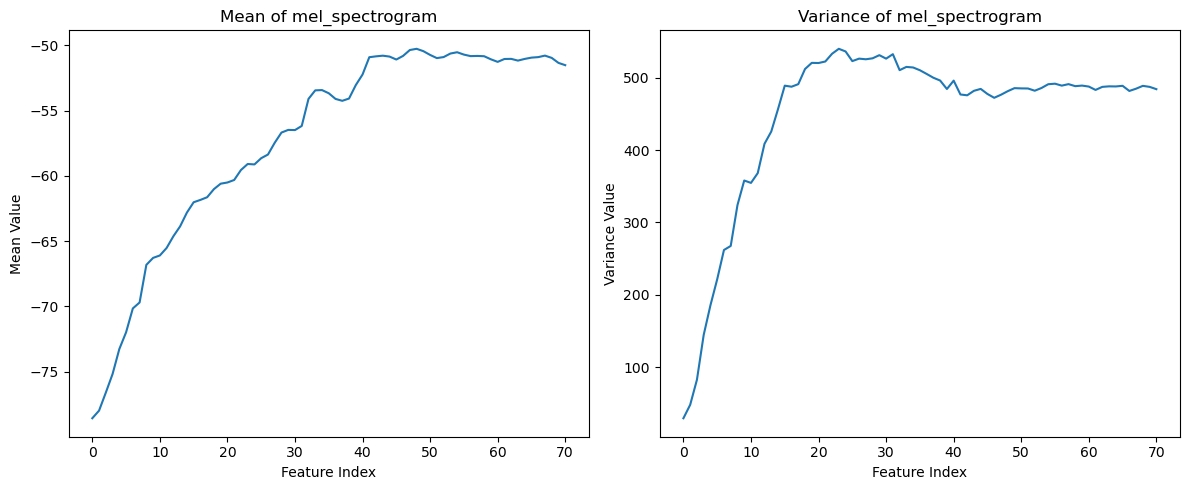

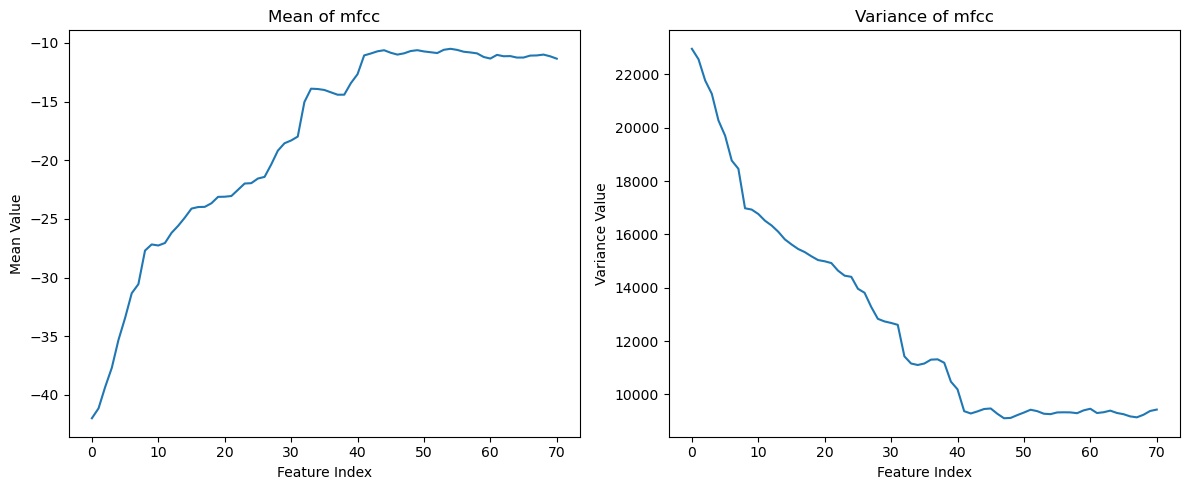

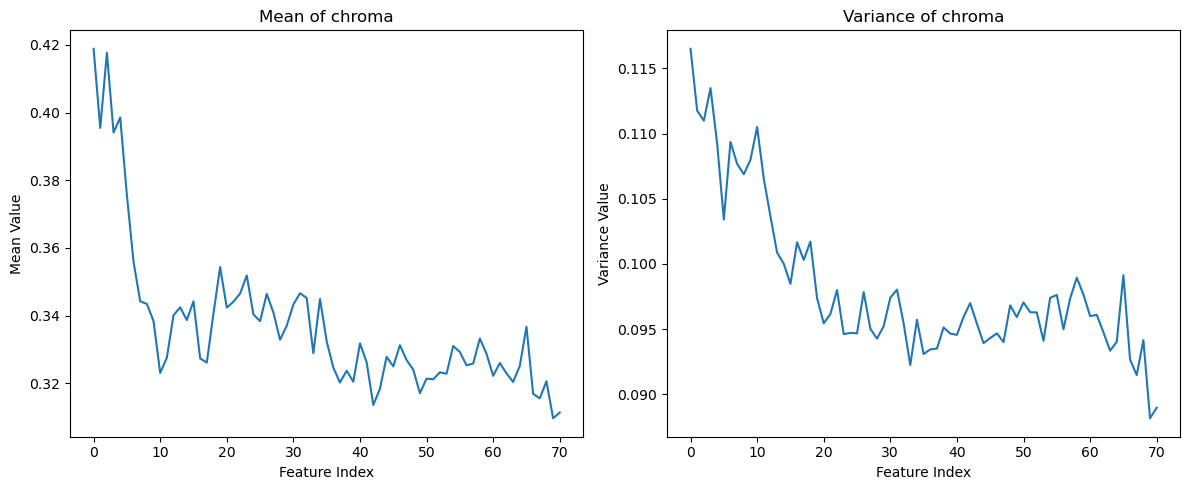

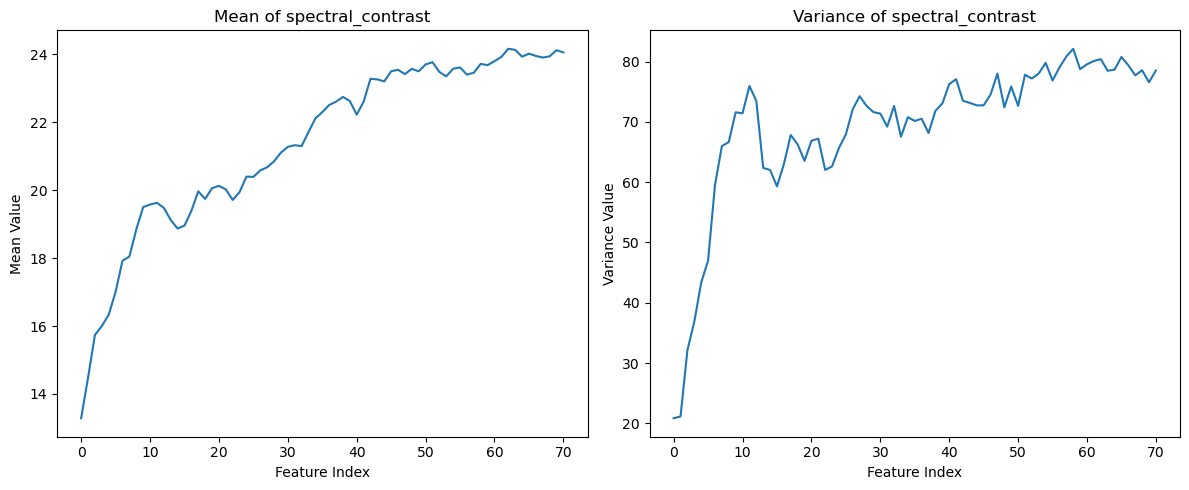

In [22]:
file_paths_am = data_directory['Am'] 
features = extract_features(file_paths_am)
stats = calculate_feature_statistics(features)
visualize_statistics(stats)

# Bb chord statistics 

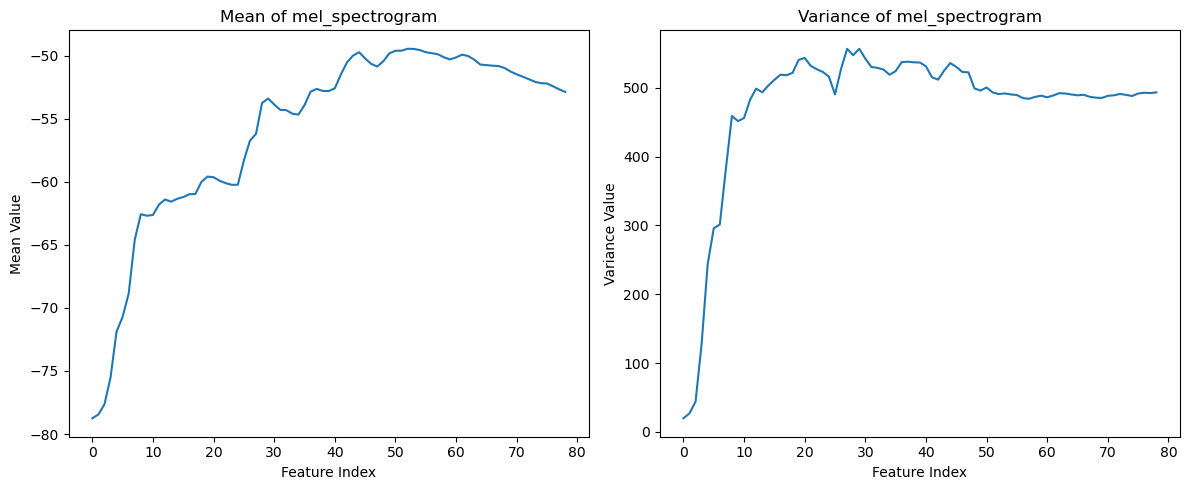

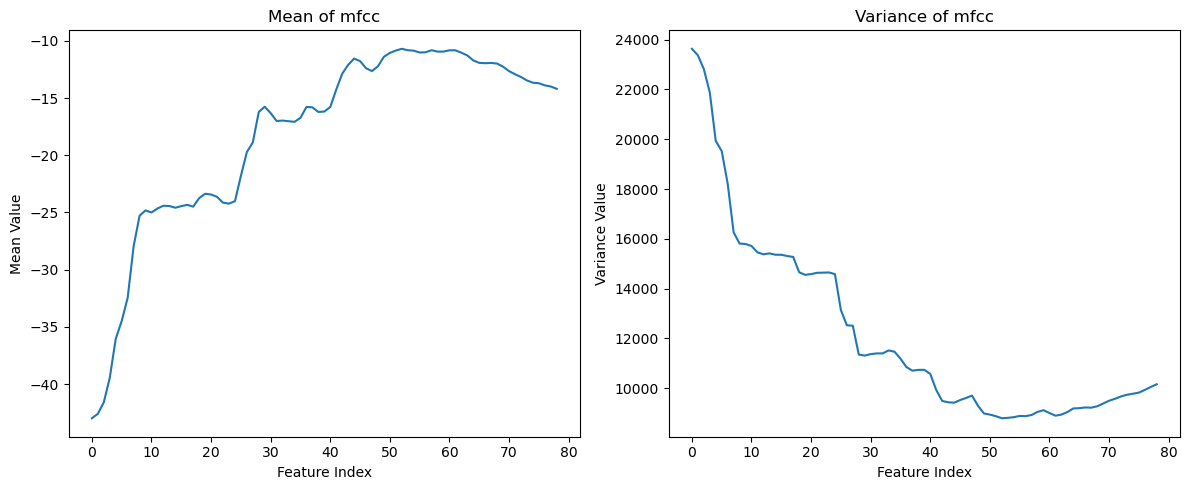

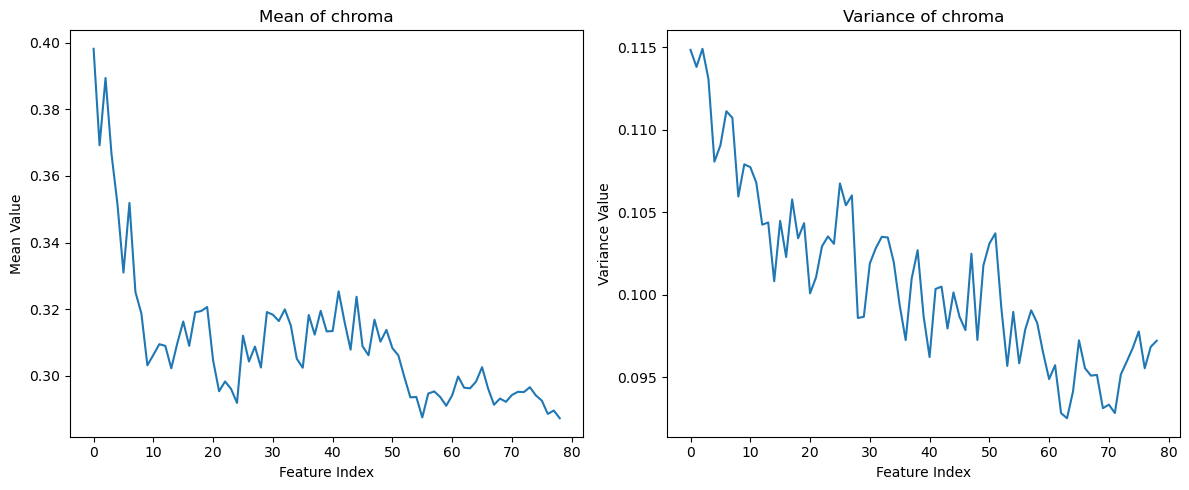

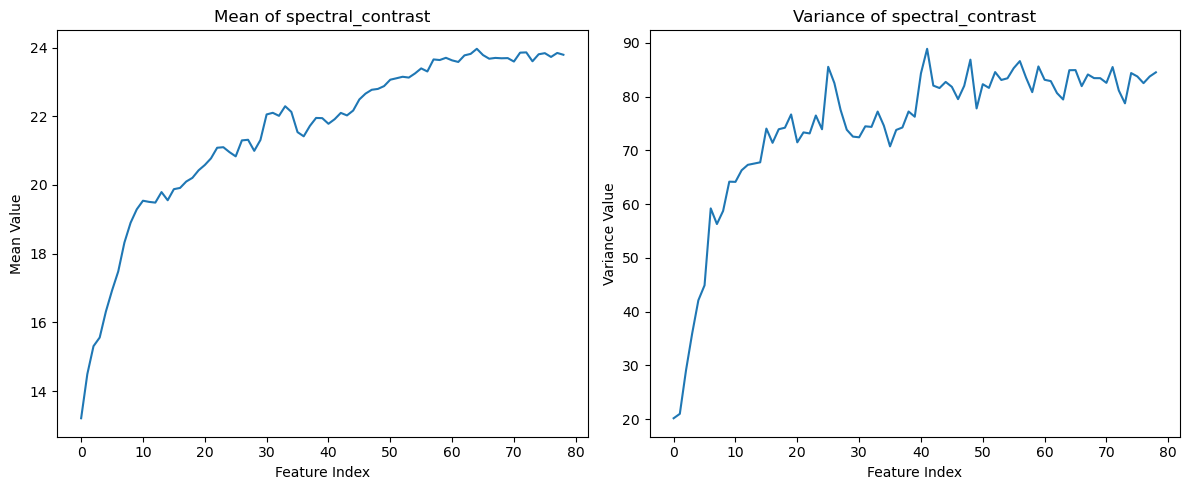

In [23]:
file_paths_bb = data_directory['Bb'] 
features = extract_features(file_paths_bb)
stats = calculate_feature_statistics(features)
visualize_statistics(stats)

# Bdim chord statistics 

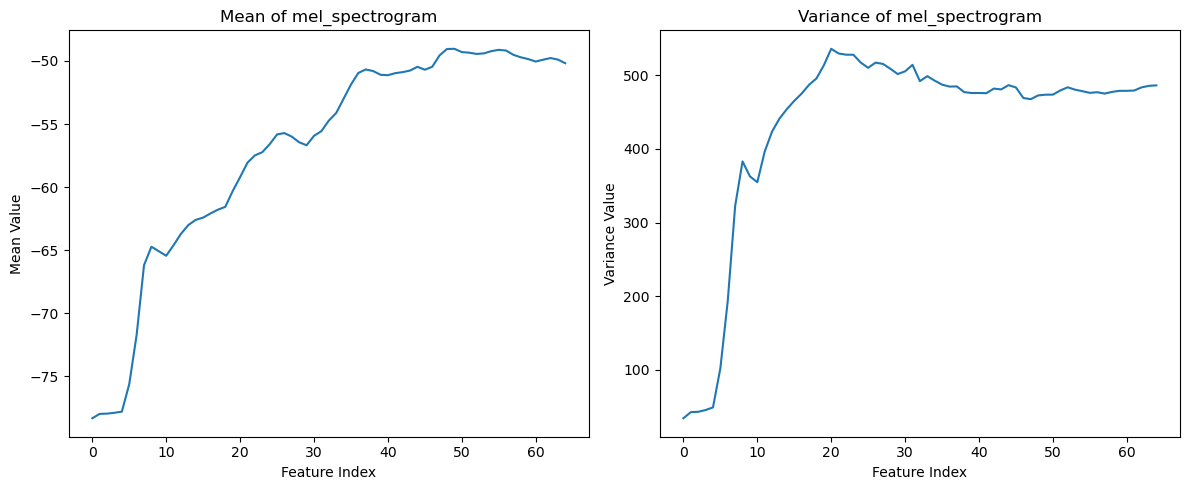

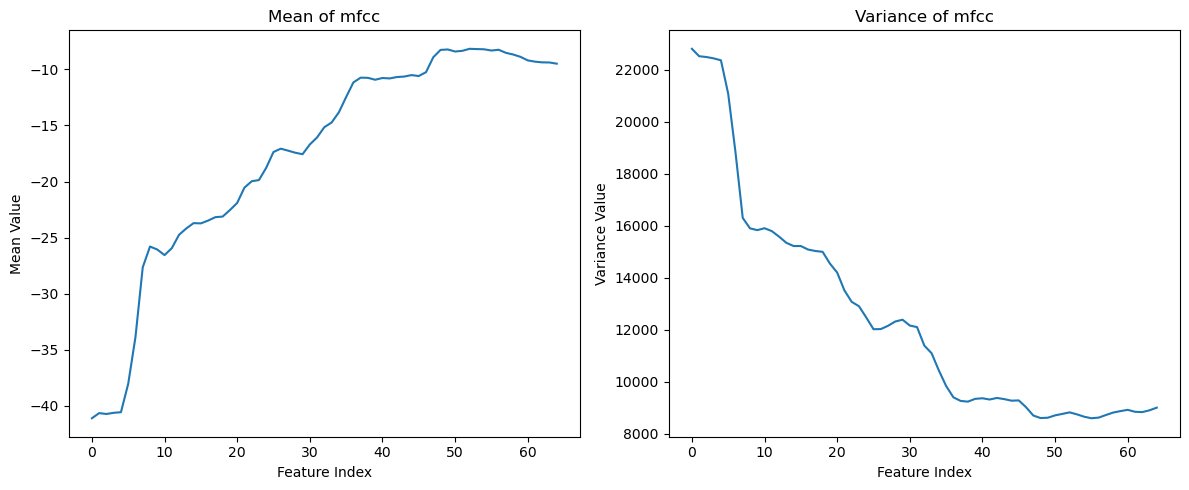

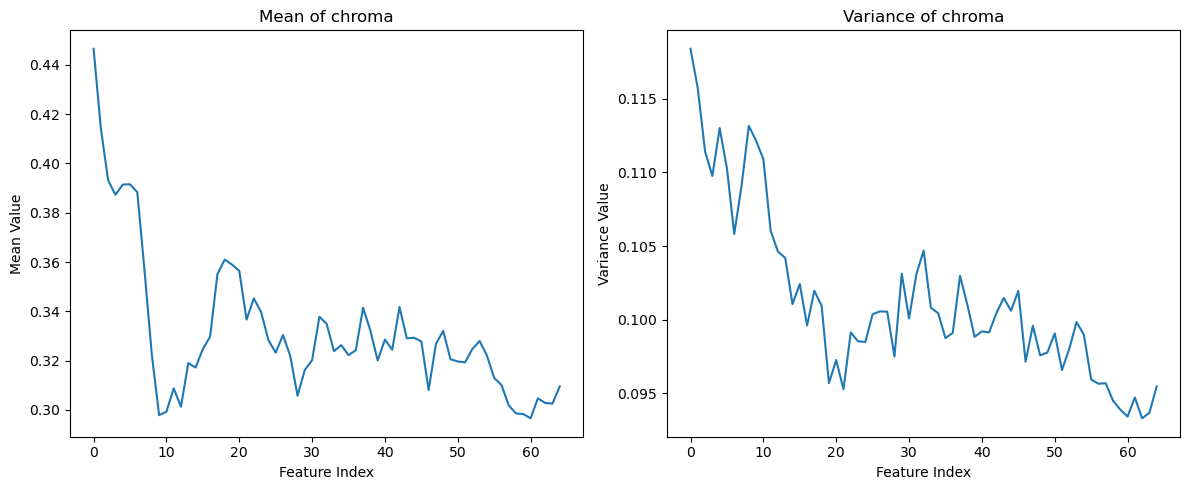

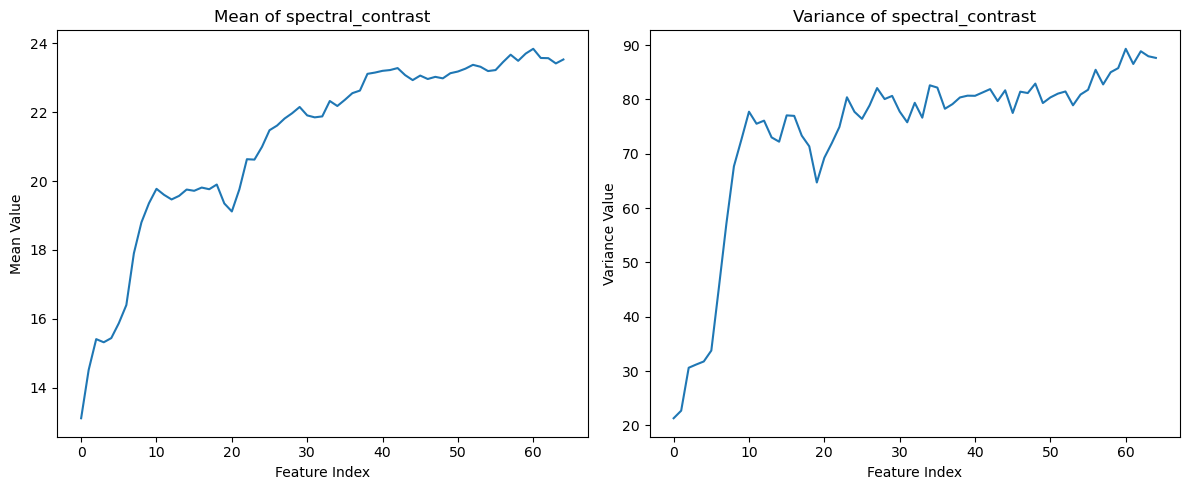

In [24]:
file_paths_bdim = data_directory['Bdim'] 
features = extract_features(file_paths_bdim)
stats = calculate_feature_statistics(features)
visualize_statistics(stats)

# C chord statistics 

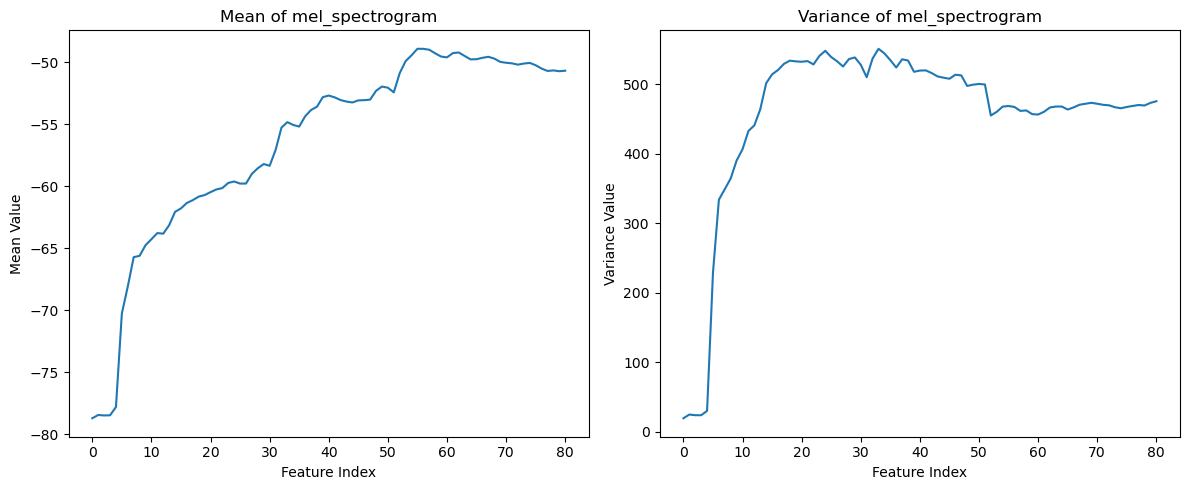

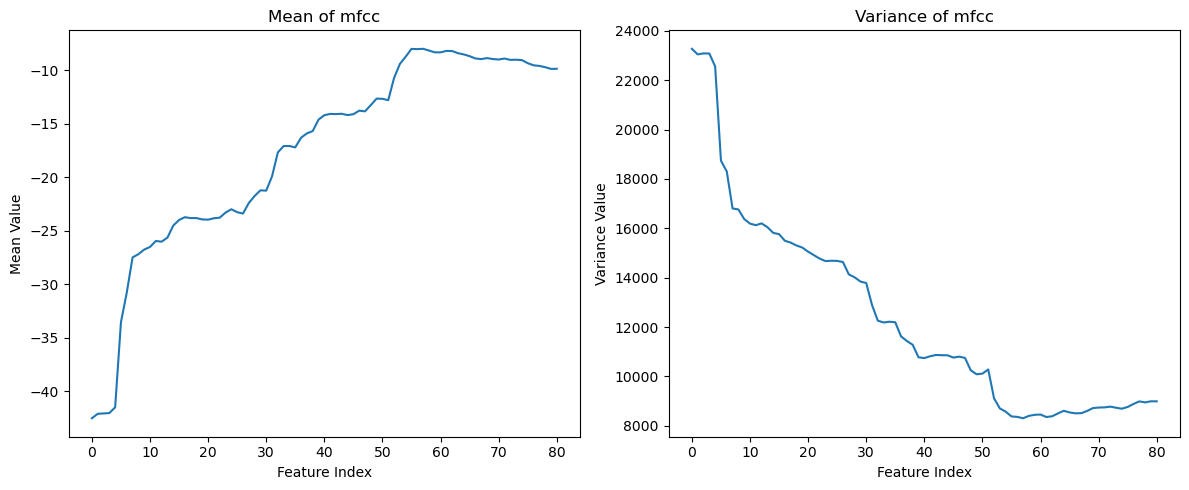

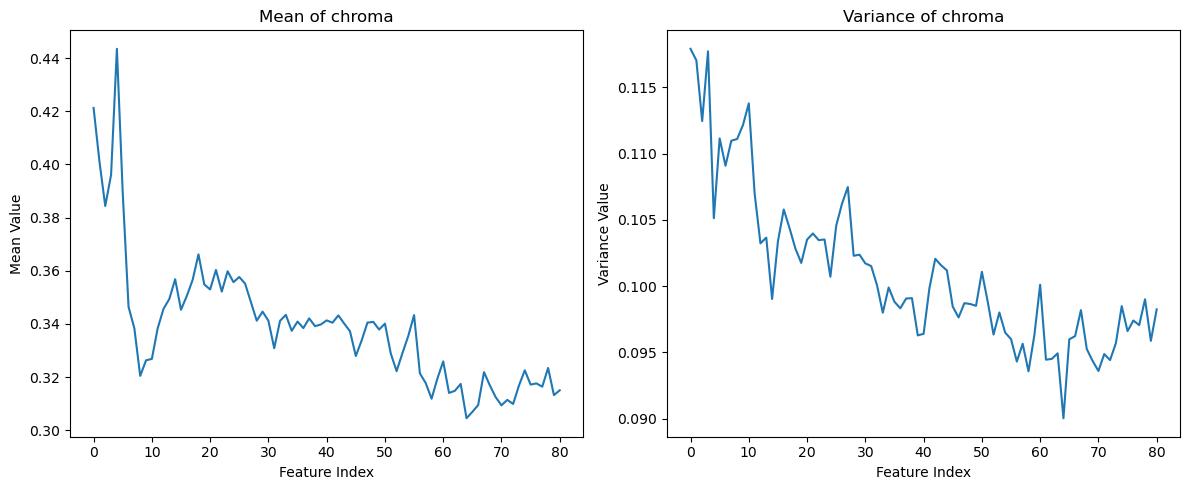

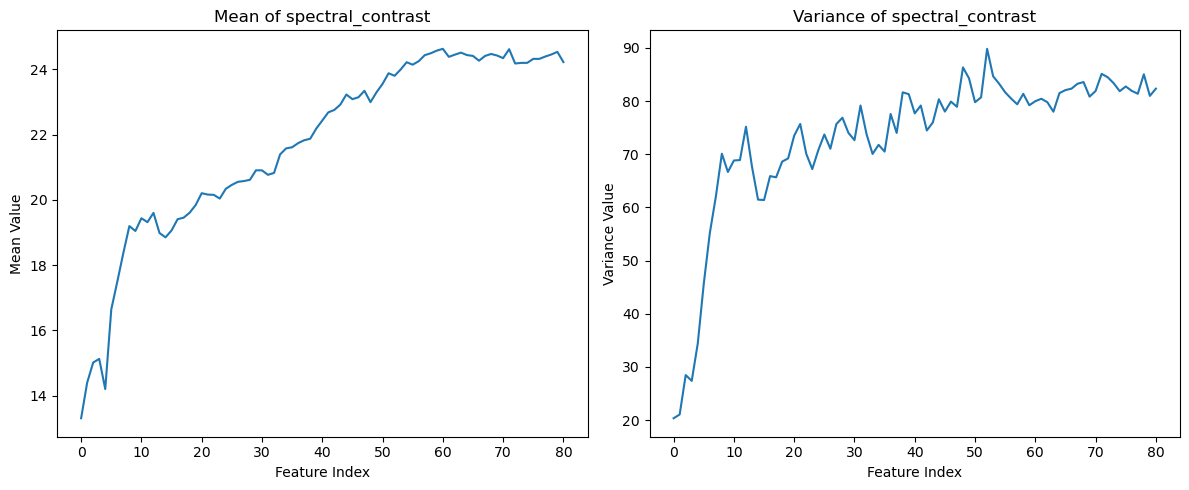

In [25]:
file_paths_c = data_directory['C'] 
features = extract_features(file_paths_c)
stats = calculate_feature_statistics(features)
visualize_statistics(stats)

# Dm chord statistics 

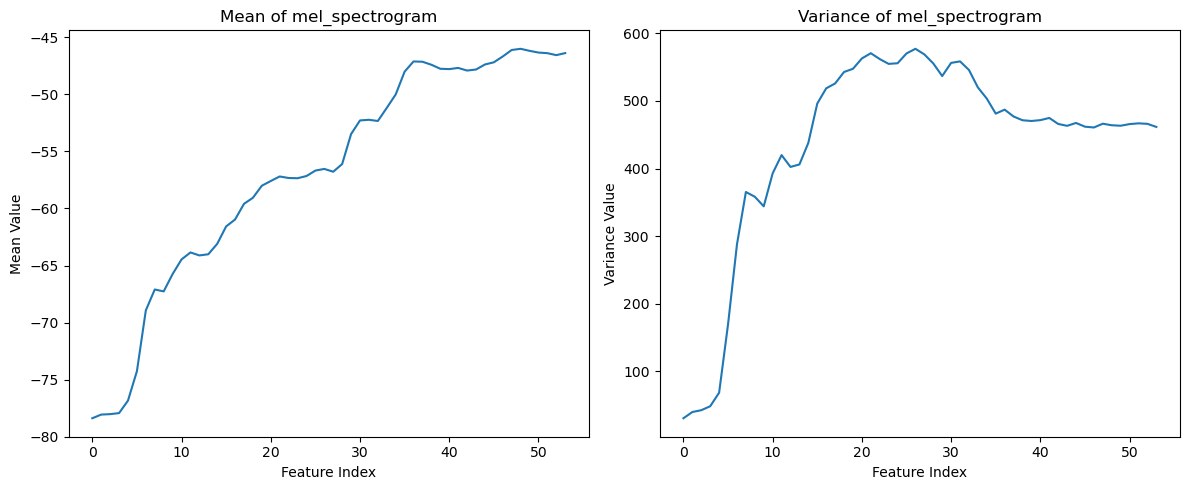

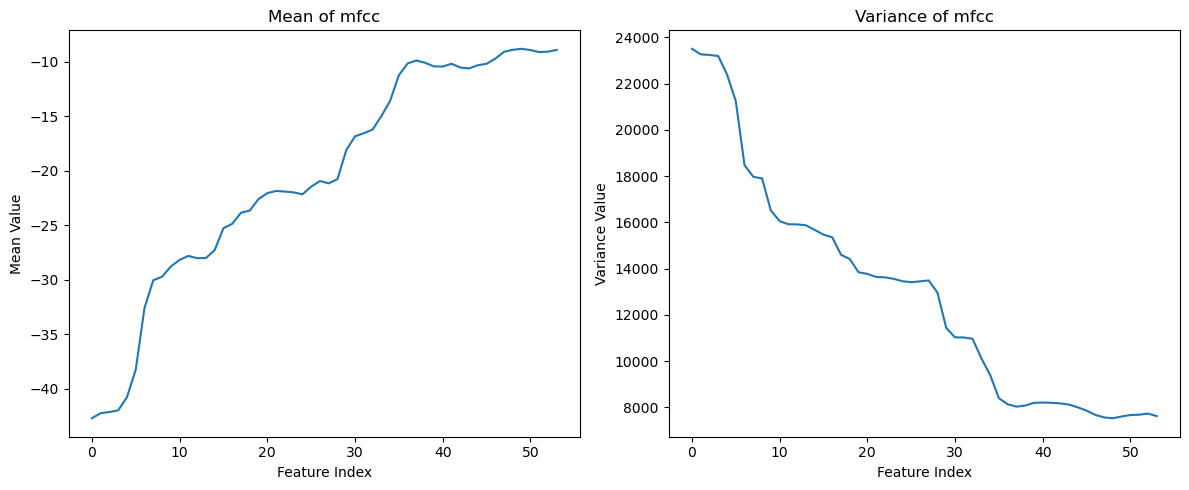

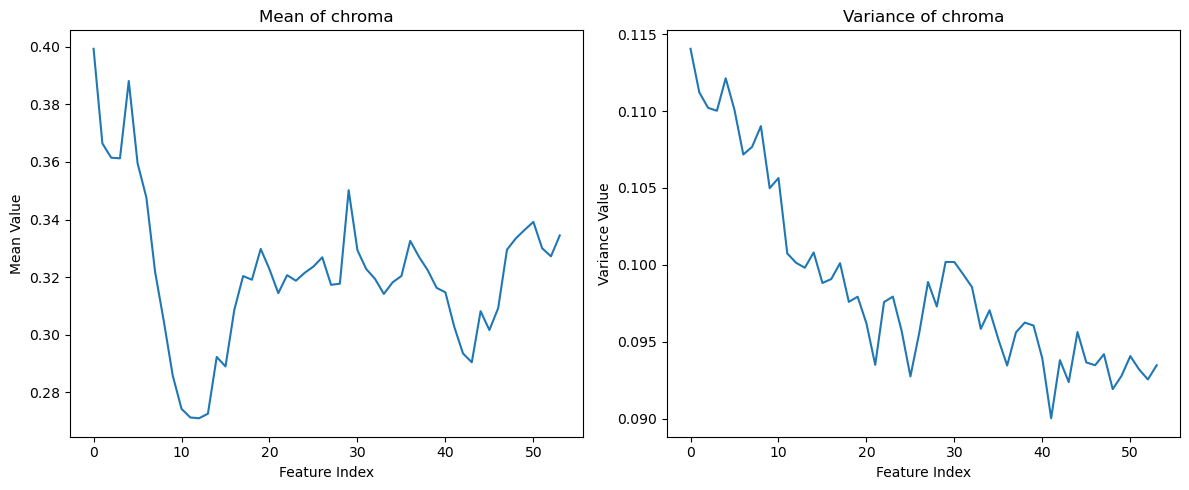

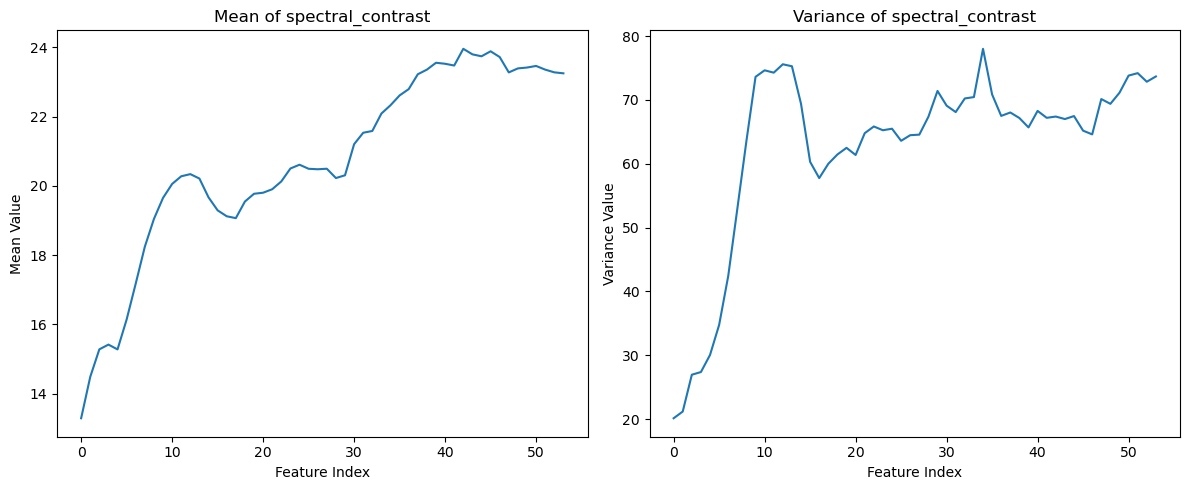

In [26]:
file_paths_dm = data_directory['Dm'] 
features = extract_features(file_paths_dm)
stats = calculate_feature_statistics(features)
visualize_statistics(stats)

# Em chord statistics 

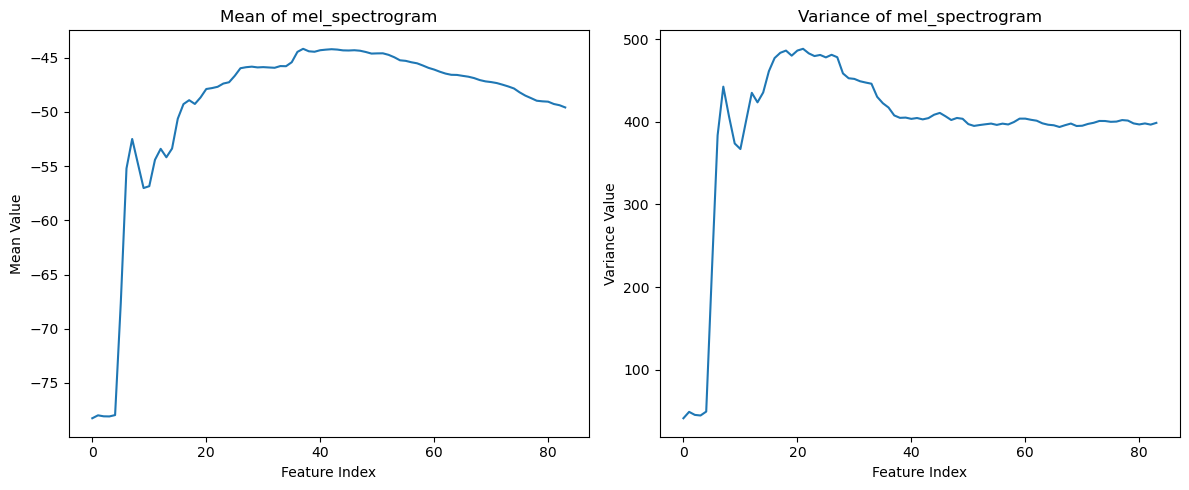

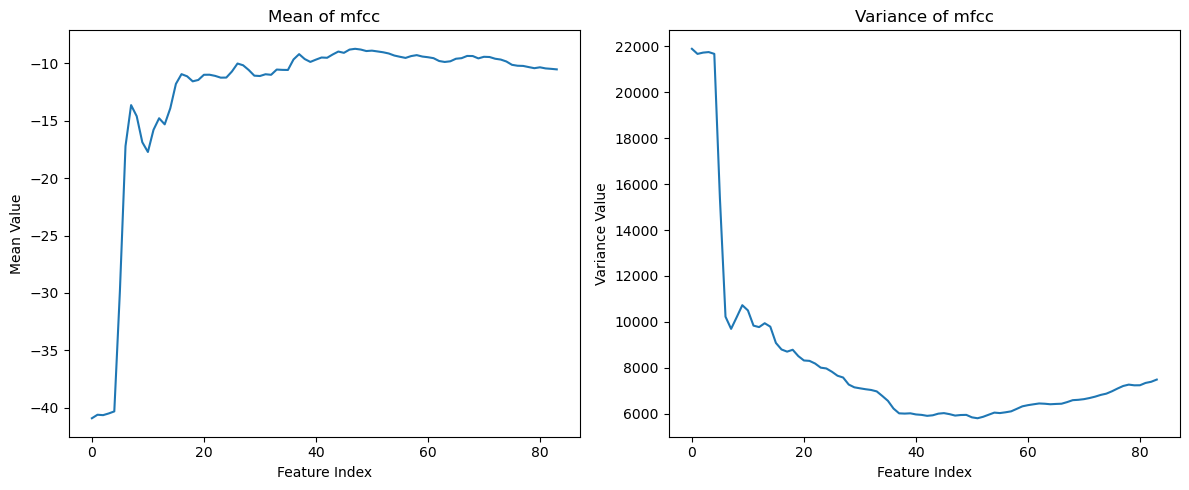

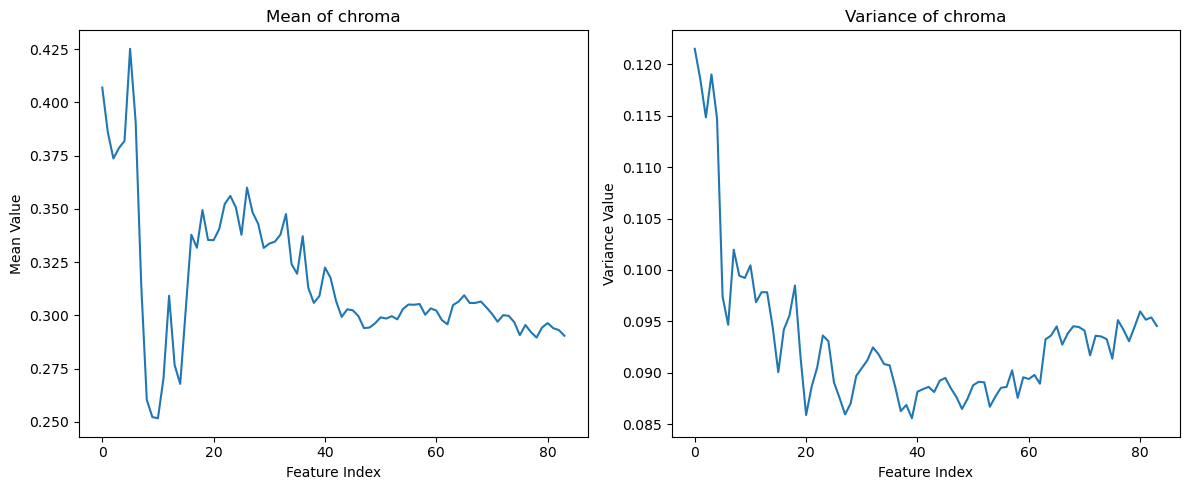

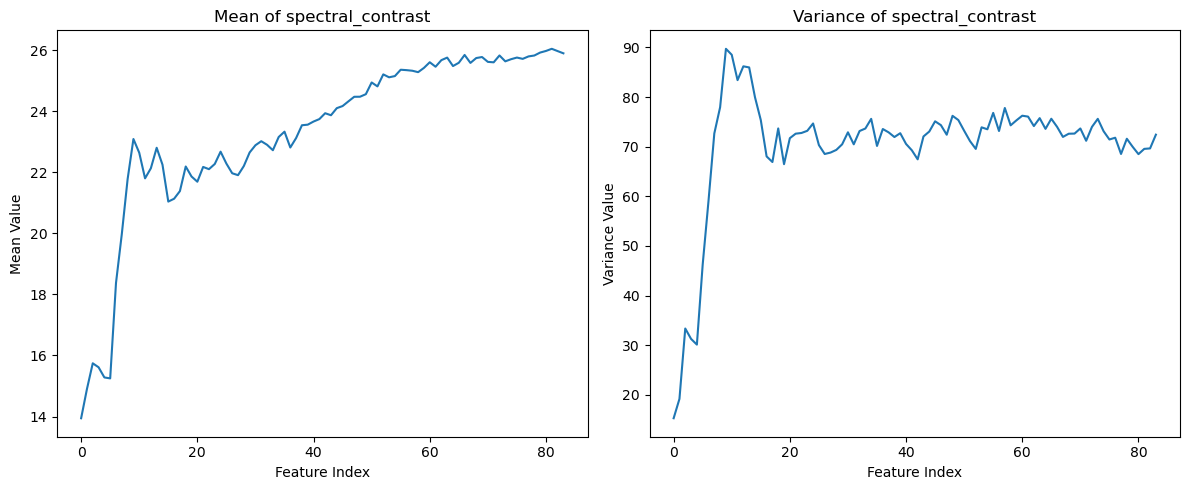

In [27]:
file_paths_em = data_directory['Em'] 
features = extract_features(file_paths_em)
stats = calculate_feature_statistics(features)
visualize_statistics(stats)

# F chord statistics 

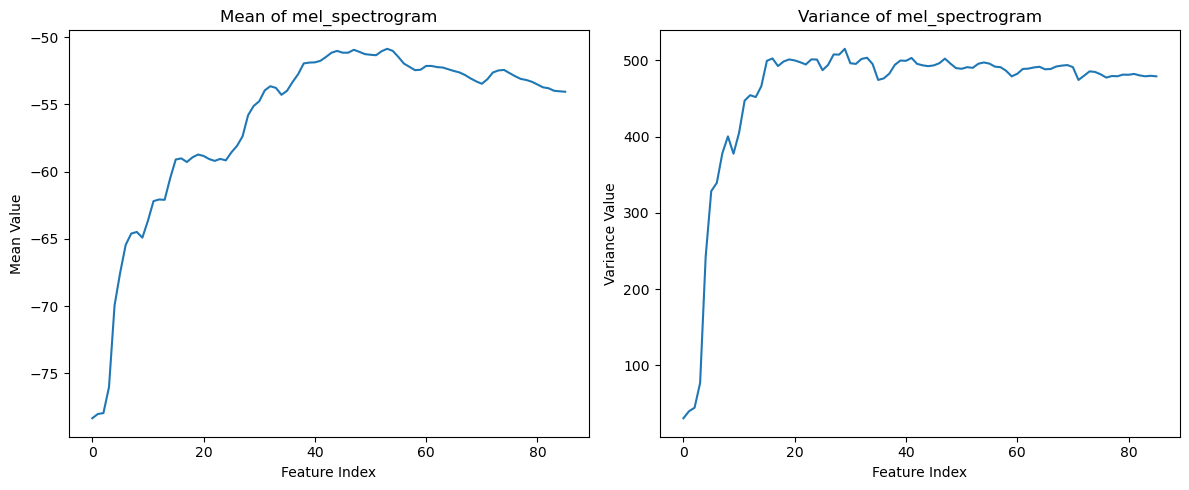

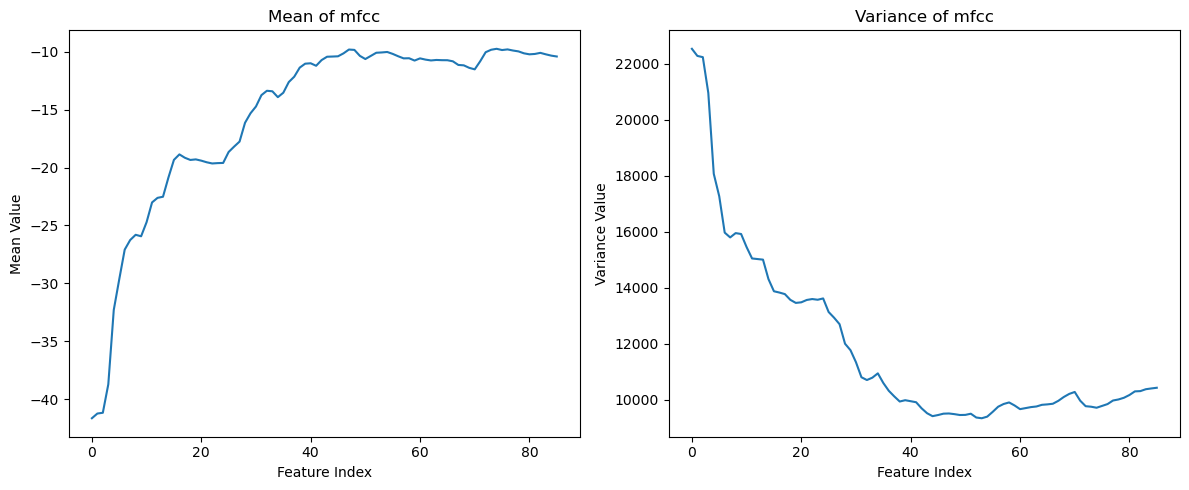

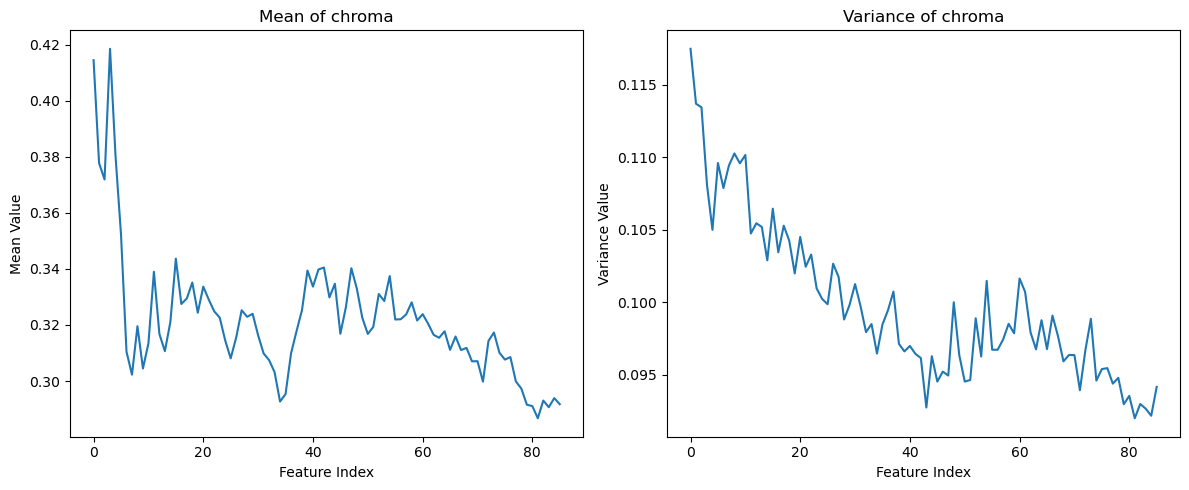

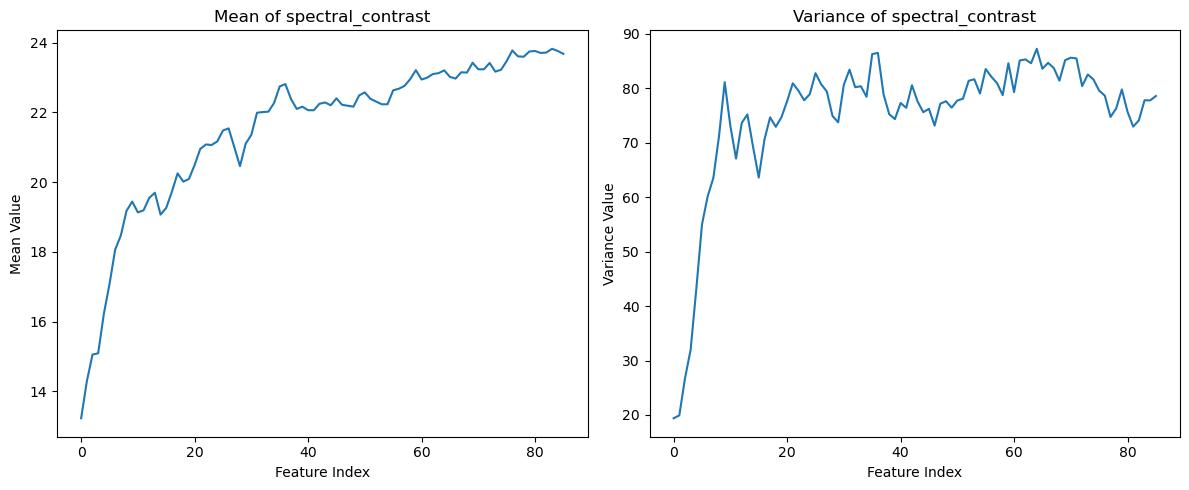

In [28]:
file_paths_f = data_directory['F'] 
features = extract_features(file_paths_f)
stats = calculate_feature_statistics(features)
visualize_statistics(stats)

# G chord statistics 

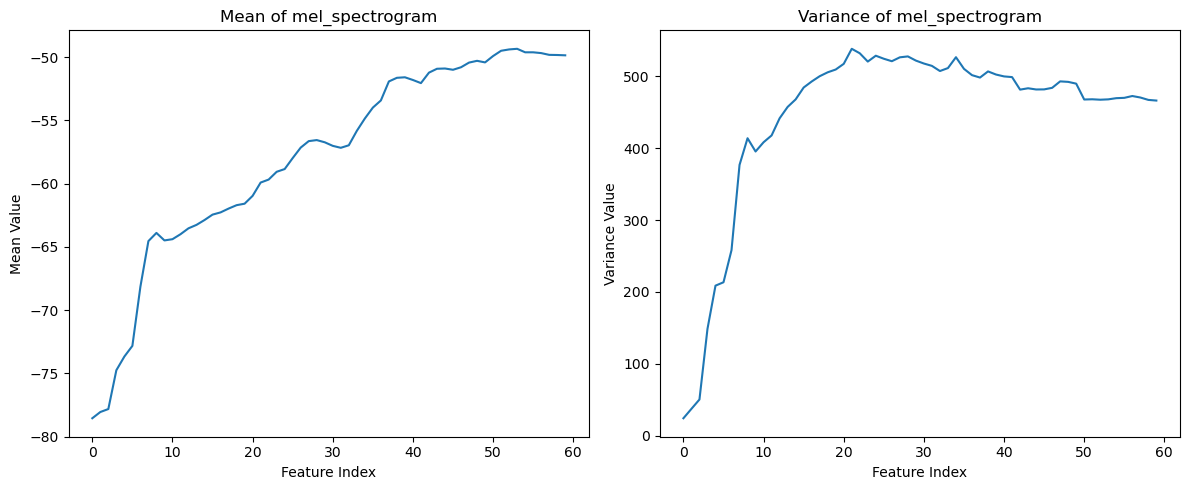

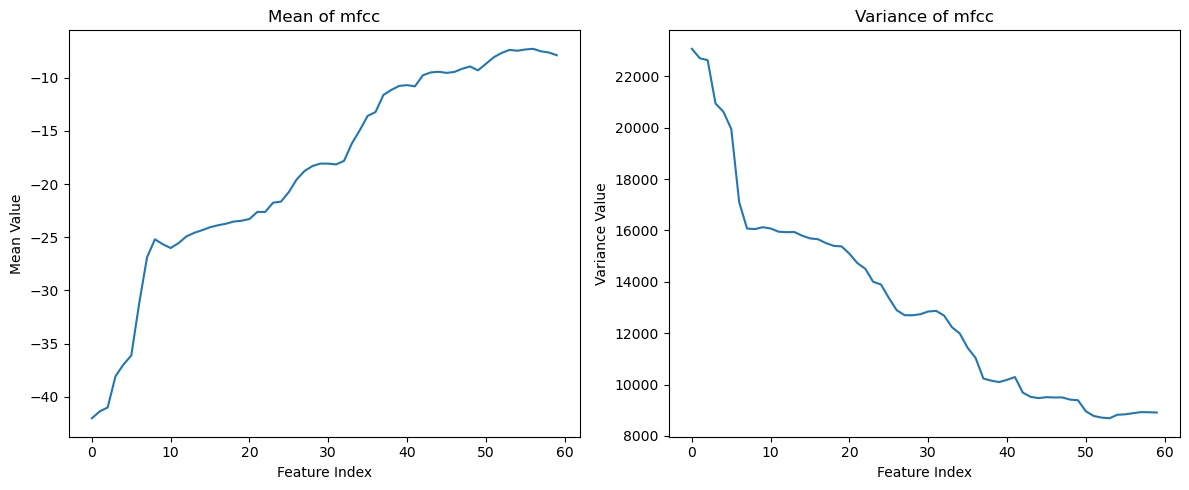

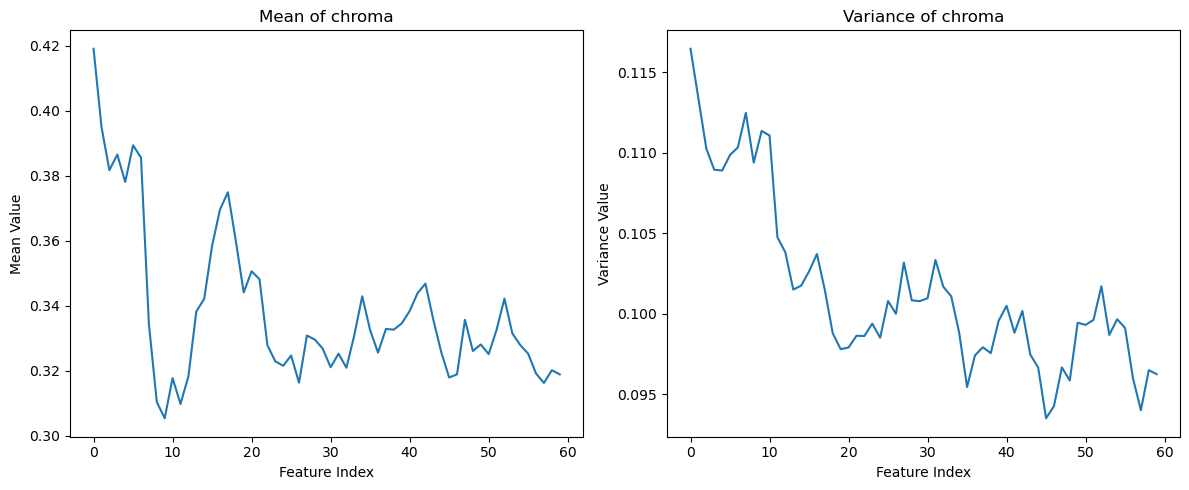

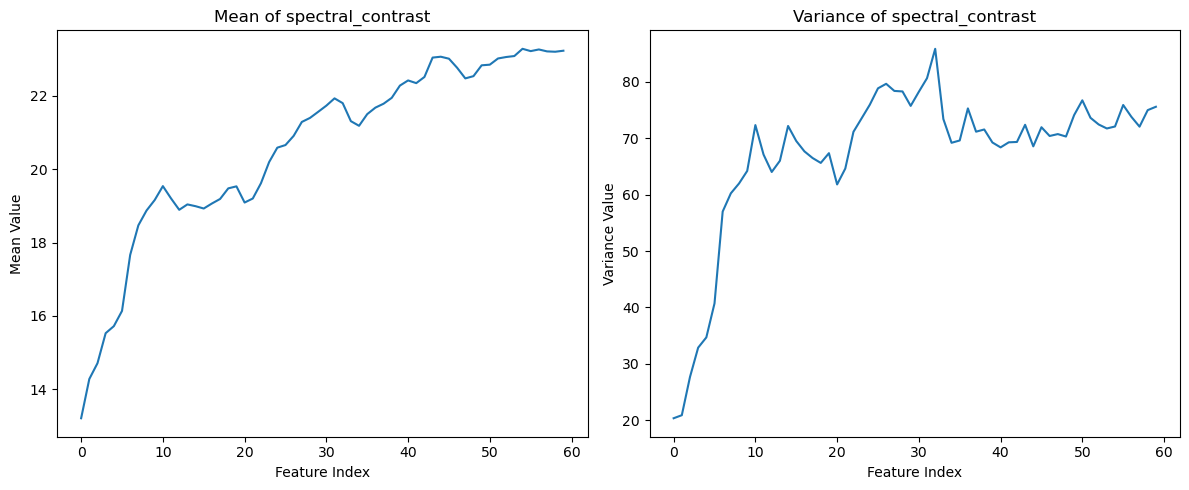

In [29]:
file_paths_g = data_directory['G'] 
features = extract_features(file_paths_g)
stats = calculate_feature_statistics(features)
visualize_statistics(stats)

# Audio quality analysis

## Signal-to-Noise Ratio (SNR)

SNR is a measure of signal strength relative to background noise. A higher SNR indicates a clearer and less noisy audio recording.

## Harmonic to Noise Ratio (HNR)
HNR measures the ratio of the harmonic (periodic) components of the sound to the non-harmonic (noise) components.

In [30]:
def estimate_snr(y, noise_start=0.9):
    """Estimate the Signal-to-Noise Ratio of an audio signal."""
    noise = y[int(len(y) * noise_start):]  # Assuming last 10% is noise
    signal = y[:int(len(y) * noise_start)]
    signal_power = np.mean(signal**2)
    noise_power = np.mean(noise**2)
    if noise_power == 0:
        noise_power = 1e-10  # Add a small constant to avoid division by zero
    snr = 10 * np.log10(signal_power / noise_power)
    return snr


def estimate_hnr(y, sr):
    """Estimate the Harmonic to Noise Ratio using harmonic-percussive source separation."""
    harmonic, percussive = librosa.effects.hpss(y)
    harmonic_energy = np.sum(harmonic**2)
    percussive_energy = np.sum(percussive**2)
    hnr = 10 * np.log10(harmonic_energy / percussive_energy)
    return hnr

def extract_features_snr_hnr(file_paths):
    all_features = []
    for file_path in file_paths:
        y, sr = librosa.load(file_path, sr=None)  # load the audio file
        snr = estimate_snr(y)  # estimate Signal-to-Noise Ratio
        hnr = estimate_hnr(y, sr)  # estimate Harmonic to Noise Ratio

        mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
        log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)

        features = {
            'mel_spectrogram': log_mel_spec,
            'snr': snr,
            'hnr': hnr
        }
        all_features.append(features)
    return all_features

In [31]:
def visualize_audio_quality(features):
    # Extract SNR and HNR values for visualization
    snrs = [feature['snr'] for feature in features if np.isfinite(feature['snr'])]
    hnrs = [feature['hnr'] for feature in features if np.isfinite(feature['hnr'])]

    plt.figure(figsize=(12, 5))
    plt.subplot(121)
    if snrs:  # Check if list is not empty
        plt.hist(snrs, bins=30, alpha=0.7, color='blue')
    plt.title('Distribution of SNR')
    plt.xlabel('SNR (dB)')
    plt.ylabel('Frequency')

    plt.subplot(122)
    if hnrs:  # Check if list is not empty
        plt.hist(hnrs, bins=30, alpha=0.7, color='red')
    plt.title('Distribution of HNR')
    plt.xlabel('HNR (dB)')
    plt.ylabel('Frequency')

    plt.show()

# Am audio quality

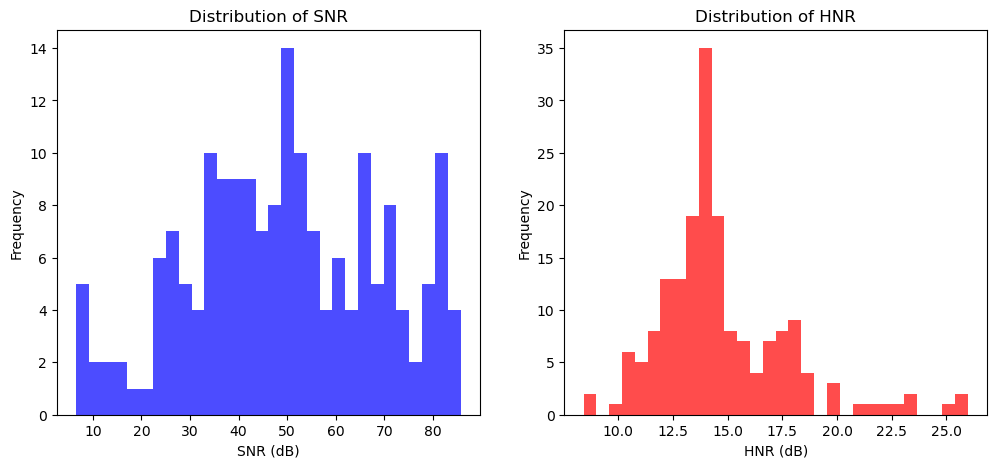

In [32]:
features = extract_features_snr_hnr(file_paths_am)
visualize_audio_quality(features)

# Bb audio quality

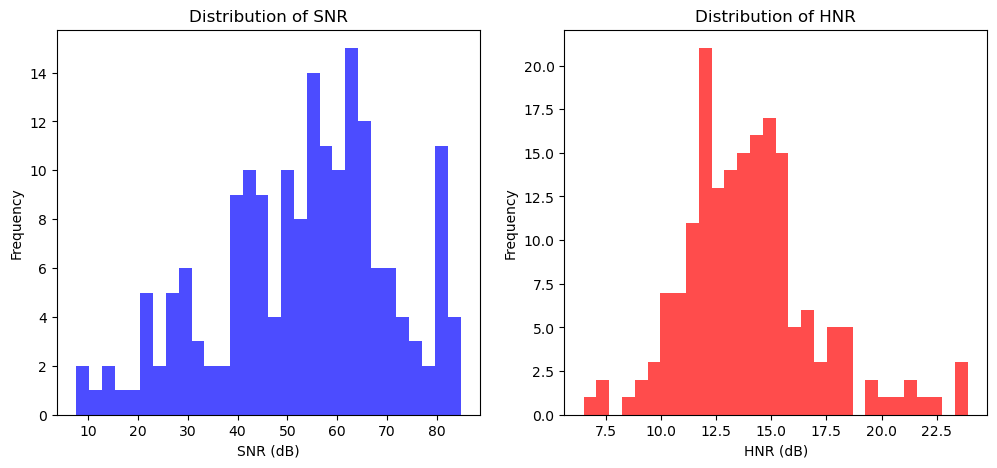

In [33]:
features = extract_features_snr_hnr(file_paths_bb)
visualize_audio_quality(features)

# Bdim audio quality

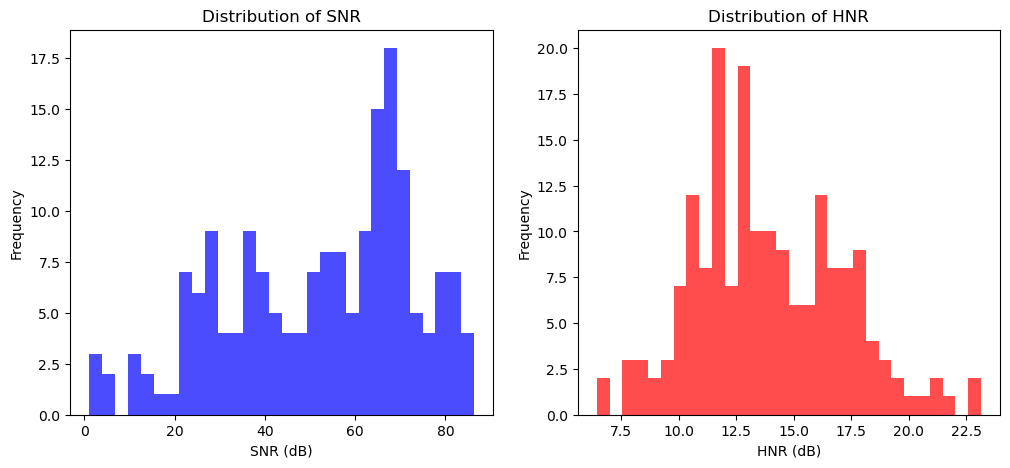

In [34]:
features = extract_features_snr_hnr(file_paths_bdim)
visualize_audio_quality(features)

# C audio quality

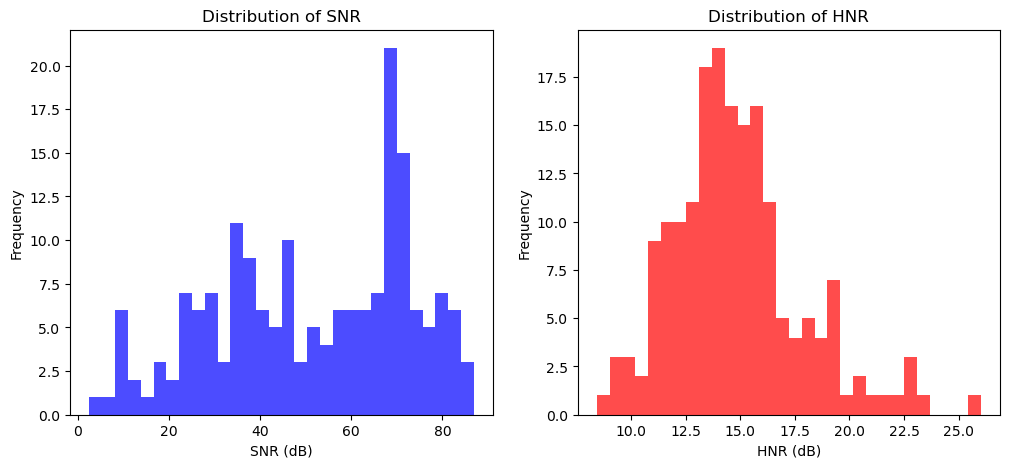

In [35]:
features = extract_features_snr_hnr(file_paths_c)
visualize_audio_quality(features)

# Dm audio quality

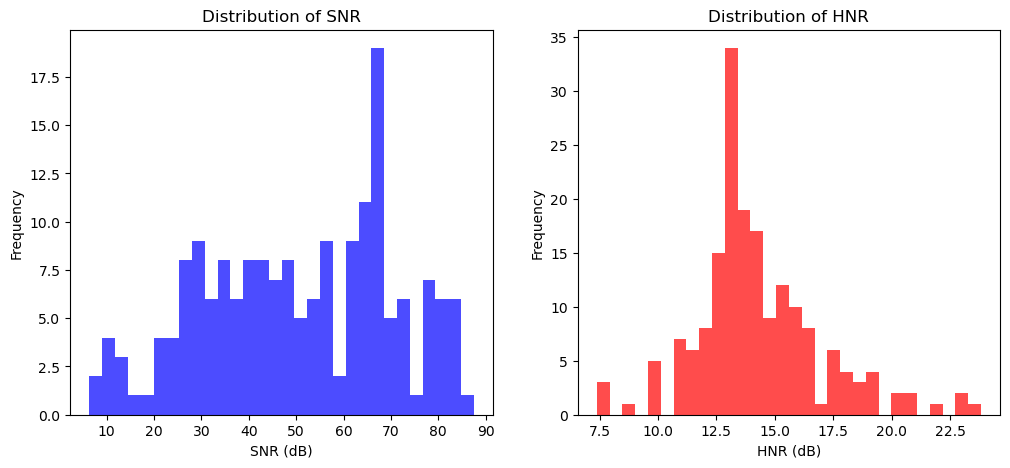

In [36]:
features = extract_features_snr_hnr(file_paths_dm)
visualize_audio_quality(features)

# Em audio quality

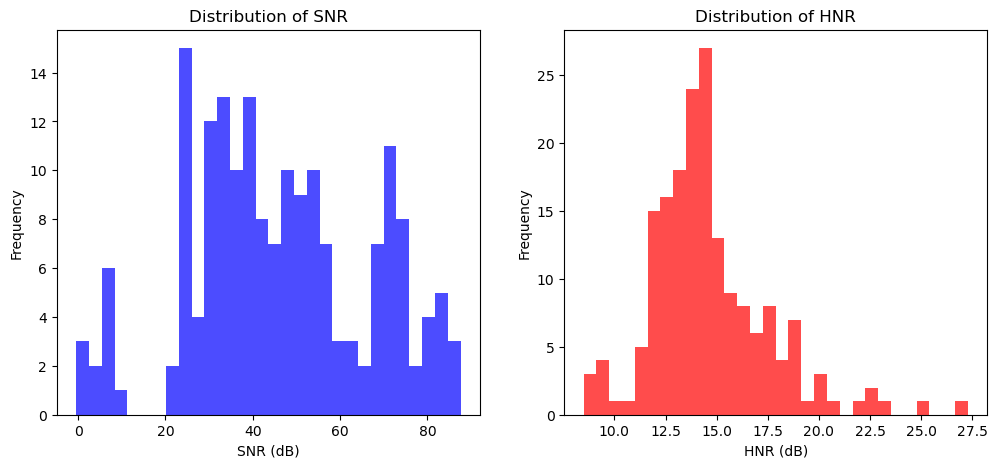

In [37]:
features = extract_features_snr_hnr(file_paths_em)
visualize_audio_quality(features)

# F audio quality

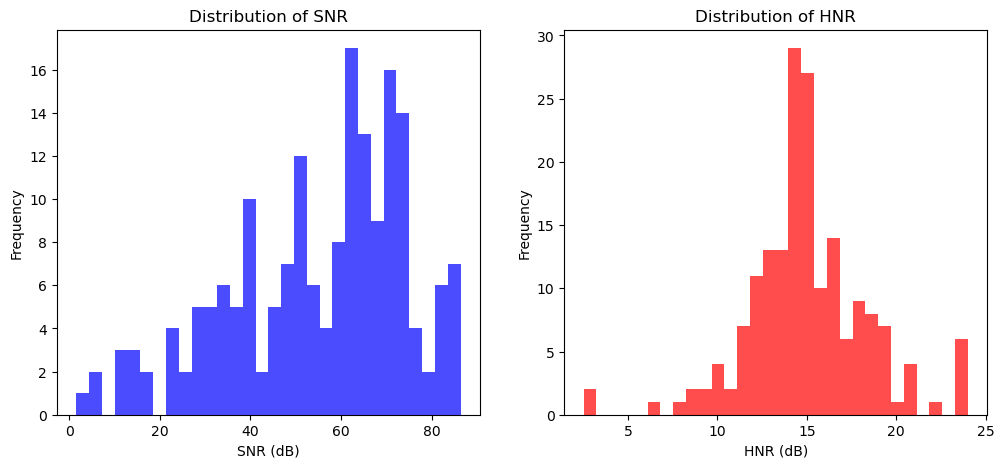

In [38]:
features = extract_features_snr_hnr(file_paths_f)
visualize_audio_quality(features)

# G audio quality

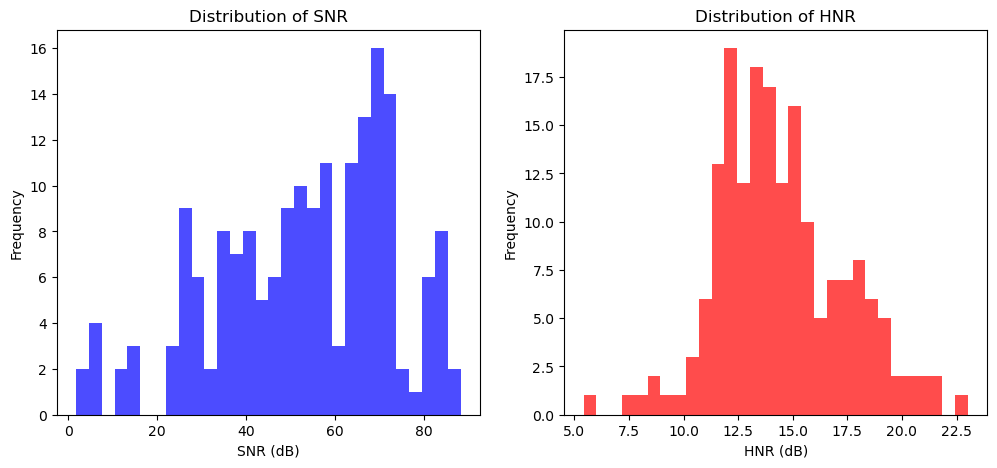

In [39]:
features = extract_features_snr_hnr(file_paths_g)
visualize_audio_quality(features)

# Guitar chord classification model

## Model overview

The `GuitarChordNet` is a convolutional neural network (CNN) designed to classify spectrogram images of guitar chords. The model captures and leverages hierarchical features from the spectrogram, ranging from basic edge features to more complex patterns, ultimately classifying into one of several chord types.

## Model architecture

### Convolutional layers

The model consists of three convolutional layers, each followed by batch normalization:

1. **First convolutional layer**: 
   - **Configuration**: 64 filters, 3x3 kernel size, padding of 1.
   - **Role**: Detects basic features like edges and textures from the input spectrogram.
   - **Activation**: Leaky ReLU, which allows a small gradient when the unit is not active.
   $$ f(x) = \max(0.01x, x) $$

2. **Second convolutional layer**:
   - **Configuration**: 64 filters, 3x3 kernel size, padding of 1.
   - **Role**: Builds on the features identified by the first layer to detect more complex patterns.
   
3. **Third convolutional layer**:
   - **Configuration**: 32 filters, 3x3 kernel size, padding of 1.
   - **Role**: Further refines features for high-level reasoning within the neural network.

### Batch normalization

- **Purpose**: Normalizes the output of each convolutional layer to improve training speed and stability by reducing internal covariate shift.

### Pooling layer

- **Configuration**: Max pooling with a 2x2 window, stride of 2.
- **Role**: Reduces spatial dimensions of the feature maps to decrease computational load, control overfitting, and increase feature detector field size.

### Dropout layer

- **Configuration**: Dropout rate of 0.5.
- **Role**: Randomly zeroes some of the feature map elements, making the model more robust to slight variations and preventing overfitting.

### Global average pooling (GAP)

- **Role**: Reduces each feature map to a single average value. This layer simplifies the network by reducing the total number of parameters and helps combat overfitting.

### Fully connected layer

- **Role**: Maps the output of the GAP layer to the number of chord classes.
- **Output**: Logits for each class which are then passed through a softmax layer to get probabilities.
$$ p_c = \frac{e^{z_c}}{\sum_{d=1}^De^{z_d}} $$
where $p_c$ is the probability of class $c$, $z_c$ is the logit for class $c$, and $D$ is the total number of classes.

## Implementation details

- **Activation function**: Leaky ReLU is used for non-linear activation to introduce non-linearity into the model, allowing it to learn more complex patterns.
- **Optimizer**: Typically, a model like this could be trained using Adam or SGD optimizers, with a learning rate of `0.001` as specified in the configuration.
- **Loss function**: The network uses cross-entropy loss, which is effective for categorical classification tasks. It measures the performance of a classification model whose output is a probability value between 0 and 1.


The `GuitarChordNet` utilizes powerful CNN architectures to effectively classify guitar chords from their spectrograms. Its design is aimed at achieving high accuracy while being computationally efficient, making it suitable for real-time applications.


In [5]:
import torch.nn as nn
import torch.nn.functional as F

# CNN model for guitar chord classification
class GuitarChordNet(nn.Module):
    def __init__(self):
        super(GuitarChordNet, self).__init__()
        
        # convolutional layer 1 with 64 filters, kernel size of 3, and padding of 1
        # this layer will help in detecting basic features such as edges from the input spectrogram
        self.conv1 = nn.Conv2d(128, 64, kernel_size=3, padding=1)
        
        # batch normalization for the first convolutional layer
        # normalizes the output of the previous layer to improve training speed and stability
        self.bn1 = nn.BatchNorm2d(64)
        
        # convolutional layer 2 with 64 filters, kernel size of 3, and padding of 1
        # stacks on the features detected by conv1 to detect more complex patterns in the data
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        
        # batch normalization for the second convolutional layer
        self.bn2 = nn.BatchNorm2d(64)
        
        # convolutional layer 3 with 32 filters, kernel size of 3, and padding of 1
        # further refines the feature map to prepare for high-level reasoning in the neural network
        self.conv3 = nn.Conv2d(64, 32, kernel_size=3, padding=1)
        
        # natch normalization for the third convolutional layer
        self.bn3 = nn.BatchNorm2d(32)
        
        # pooling layer to reduce the spatial dimensions of the output from convolutional layers
        # helps in making the detection of features invariant to scale and orientation changes
        self.pool = nn.MaxPool2d(2, ceil_mode=True, stride=2)
        
        # dropout layer to prevent overfitting by randomly setting a fraction of input units to 0 during training
        self.dropout = nn.Dropout(0.5)
        
        # global average pooling layer to reduce each feature map to a single average value
        # reduces the total number of parameters and computation in the network, and helps in combating overfitting
        self.global_avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        
        # fully connected layer that maps the output of the global average pooling layer to the number of chord classes
        # this layer outputs the logits for each class
        self.fc = nn.Linear(32, 8) # chords

    def forward(self, x):
        # apply leaky ReLU activation to the output of the first batch-normalized convolutional layer
        x = F.leaky_relu(self.bn1(self.conv1(x)))
        # apply pooling to reduce the dimensionality
        x = self.pool(x)
        # repeat the process for the second and third convolutional layers
        x = F.leaky_relu(self.bn2(self.conv2(x)))
        x = self.pool(x)
        x = F.leaky_relu(self.bn3(self.conv3(x)))
        x = self.pool(x)
        # apply dropout to the output of the last pooling layer
        x = self.dropout(x)
        # apply global average pooling to the final feature map
        x = self.global_avg_pool(x)
        # flatten the output to prepare it for the fully connected layer
        x = x.view(x.size(0), -1)
        # pass the flattened output through the fully connected layer
        x = self.fc(x)
        # apply log softmax activation to the output of the fully connected layer to get log-probabilities of the classes
        return F.log_softmax(x, dim=1)

In [14]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import librosa
import librosa.display

def load_data(data_dir):
    train_directory, test_directory = {}, {}
    for dataset_type in ['Training', 'Test']:
        dataset_path = os.path.join(data_dir, dataset_type)
        for chord in os.listdir(dataset_path):
            if chord != '.DS_Store':
                chord_path = os.path.join(dataset_path, chord)
                files = [os.path.join(chord_path, f) for f in os.listdir(chord_path)]
                files.sort()
                if dataset_type == 'Training':
                    train_directory[chord] = files
                else:
                    test_directory[chord] = files
    return train_directory, test_directory

def get_melspectrogram(waveform):
    spectrogram = librosa.feature.melspectrogram(y=waveform, sr=conf['sr'], n_fft=conf['n_fft'], hop_length=conf['hop_length'], n_mels=conf['n_mels'])
    spectrogram = librosa.power_to_db(spectrogram, ref=np.max)
    spectrogram = np.expand_dims(spectrogram, axis=2)
    return spectrogram

def get_spectrogram(waveform):
    spectrogram = np.abs(librosa.stft(waveform, n_fft=conf['n_fft'], hop_length=conf['hop_length']))
    return spectrogram

def get_chroma_stft(waveform):
    chroma_stft = librosa.feature.chroma_stft(y=waveform, sr=conf['sr'], n_fft=conf['n_fft'], hop_length=conf['hop_length'])
    chroma_stft = np.expand_dims(chroma_stft, axis=2)
    return chroma_stft

def get_features(file):
    audio, _ = librosa.load(file)
    stft = get_spectrogram(audio)
    spec_cent_stft = librosa.feature.spectral_centroid(S=stft)
    spec_cent_stft = np.digitize(spec_cent_stft, bins=conf['bins'])
    spec_cent_stft = spec_cent_stft.flatten()
    chroma = get_chroma_stft(audio)
    mel = get_melspectrogram(audio)
    S, _ = librosa.magphase(mel)
    spec_cent_mel = librosa.feature.spectral_centroid(S=S)
    spec_cent_mel = np.digitize(spec_cent_mel, bins=conf['bins'])
    spec_cent_mel = spec_cent_mel.flatten()
    return [stft, spec_cent_stft, mel, spec_cent_mel, chroma, file]

def preprocess_data(features):
    X, y = [], []
    for feat in features:
        tmp_spec = np.full((128,128,1),-80)
        spectrogram = feat[2]
        tmp_spec[:, :spectrogram.shape[1]] = spectrogram[:, :128]
        X.append(tmp_spec)
        y.append(feat[-1])
    X = np.array(X)
    y = np.array(y)
    chord_to_int = {'Am': 0, 'Bb': 1, 'Bdim': 2, 'C': 3, 'Dm': 4, 'Em': 5, 'F': 6, 'G': 7}
    y = np.array([chord_to_int[chord] for chord in y])
    return X, y

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=500):
    train_losses = []
    val_losses = []
    accuracies = []
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        # calculate epoch-wise loss
        epoch_loss = running_loss / len(train_loader)
        train_losses.append(epoch_loss)
        
        # evaluate model on validation set
        val_loss, val_accuracy = evaluate_model(model, val_loader, criterion)
        val_losses.append(val_loss)
        accuracies.append(val_accuracy)
        
        # print epoch-wise loss and accuracy
        print(f"Epoch {epoch+1}: Train loss: {epoch_loss}, Val loss: {val_loss}, Val accuracy: {val_accuracy}%")
        
        # Check if loss is <= 0.001
        if epoch_loss <= 0.001:
            print("Training stopped as loss is <= 0.001")
            break
    
    return train_losses, val_losses, accuracies

def evaluate_model(model, val_loader, criterion):
    model.eval()
    total_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for data in val_loader:
            inputs, labels = data
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    val_loss = total_loss / len(val_loader)
    val_accuracy = 100 * correct / total
    
    return val_loss, val_accuracy

In [15]:
train_directory, test_directory = load_data(conf['data_dir'])

train_features = [get_features(file)+[label] for label, files in train_directory.items() for file in files]
test_features = [get_features(file)+[label] for label, files in test_directory.items() for file in files]

X_train, y_train = preprocess_data(train_features)
X_test, y_test = preprocess_data(test_features)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=conf['test_size'], random_state=conf['random_state'])

train_dataset = TensorDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).long())
val_dataset = TensorDataset(torch.from_numpy(X_val).float(), torch.from_numpy(y_val).long())
test_dataset = TensorDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).long())

train_loader = DataLoader(train_dataset, batch_size=conf['batch_size'], shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=conf['batch_size'], shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=conf['batch_size'], shuffle=False)

model = GuitarChordNet()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=conf['learning_rate'])

train_losses, val_losses, accuracies = train_model(model, train_loader, val_loader, criterion, optimizer)
val_loss, val_accuracy = evaluate_model(model, val_loader, criterion)

Epoch 1: Train loss: 1.8582339763641358, Val loss: 2.0418803691864014, Val accuracy: 23.26388888888889%
Epoch 2: Train loss: 1.3432712078094482, Val loss: 1.940592110157013, Val accuracy: 39.583333333333336%
Epoch 3: Train loss: 1.1317204236984253, Val loss: 1.8259556293487549, Val accuracy: 45.486111111111114%
Epoch 4: Train loss: 0.9888638734817505, Val loss: 1.763720452785492, Val accuracy: 63.541666666666664%
Epoch 5: Train loss: 0.8909027218818665, Val loss: 1.5021342635154724, Val accuracy: 62.84722222222222%
Epoch 6: Train loss: 0.801665997505188, Val loss: 1.1630357503890991, Val accuracy: 86.11111111111111%
Epoch 7: Train loss: 0.7273324251174926, Val loss: 1.08074152469635, Val accuracy: 91.31944444444444%
Epoch 8: Train loss: 0.6606191396713257, Val loss: 0.8985136449337006, Val accuracy: 98.95833333333333%
Epoch 9: Train loss: 0.6067132234573365, Val loss: 0.9084607362747192, Val accuracy: 77.77777777777777%
Epoch 10: Train loss: 0.5535494446754455, Val loss: 0.816148430109

Epoch 79: Train loss: 0.01791193000972271, Val loss: 0.06884164921939373, Val accuracy: 99.30555555555556%
Epoch 80: Train loss: 0.01739253643900156, Val loss: 0.14300696179270744, Val accuracy: 96.875%
Epoch 81: Train loss: 0.017354875057935714, Val loss: 0.036925725638866425, Val accuracy: 99.65277777777777%
Epoch 82: Train loss: 0.01816889550536871, Val loss: 0.09286611154675484, Val accuracy: 98.61111111111111%
Epoch 83: Train loss: 0.018842524290084837, Val loss: 0.3058170974254608, Val accuracy: 91.31944444444444%
Epoch 84: Train loss: 0.016288716346025467, Val loss: 0.16602008417248726, Val accuracy: 97.22222222222223%
Epoch 85: Train loss: 0.016399715468287467, Val loss: 0.05191548727452755, Val accuracy: 98.26388888888889%
Epoch 86: Train loss: 0.015997489169239997, Val loss: 0.09317287616431713, Val accuracy: 98.26388888888889%
Epoch 87: Train loss: 0.014470476284623146, Val loss: 0.0362677751109004, Val accuracy: 99.65277777777777%
Epoch 88: Train loss: 0.01433931030333042, 

Epoch 156: Train loss: 0.02555660530924797, Val loss: 1.1377725303173065, Val accuracy: 73.26388888888889%
Epoch 157: Train loss: 0.025568442791700362, Val loss: 0.5135172605514526, Val accuracy: 87.84722222222223%
Epoch 158: Train loss: 0.01853613182902336, Val loss: 0.6875482648611069, Val accuracy: 83.33333333333333%
Epoch 159: Train loss: 0.015522307716310024, Val loss: 0.16847999393939972, Val accuracy: 95.83333333333333%
Epoch 160: Train loss: 0.013422944769263267, Val loss: 0.7006248533725739, Val accuracy: 76.38888888888889%
Epoch 161: Train loss: 0.01662980727851391, Val loss: 0.20353012531995773, Val accuracy: 96.18055555555556%
Epoch 162: Train loss: 0.016040714271366597, Val loss: 3.3337795734405518, Val accuracy: 43.40277777777778%
Epoch 163: Train loss: 0.014160941727459431, Val loss: 1.1640796065330505, Val accuracy: 65.97222222222223%
Epoch 164: Train loss: 0.013522444665431977, Val loss: 0.3979915678501129, Val accuracy: 90.27777777777777%
Epoch 165: Train loss: 0.0110

Epoch 232: Train loss: 0.0032558483071625233, Val loss: 0.007805085740983486, Val accuracy: 99.65277777777777%
Epoch 233: Train loss: 0.003097508428618312, Val loss: 0.10482852160930634, Val accuracy: 97.91666666666667%
Epoch 234: Train loss: 0.008019640389829875, Val loss: 0.2121402509510517, Val accuracy: 96.18055555555556%
Epoch 235: Train loss: 0.012296975729987026, Val loss: 3.665495276451111, Val accuracy: 28.125%
Epoch 236: Train loss: 0.023882458917796612, Val loss: 2.137869417667389, Val accuracy: 52.43055555555556%
Epoch 237: Train loss: 0.021880592964589596, Val loss: 2.6448956727981567, Val accuracy: 57.291666666666664%
Epoch 238: Train loss: 0.023197146691381933, Val loss: 2.3269866704940796, Val accuracy: 54.861111111111114%
Epoch 239: Train loss: 0.03273342996835708, Val loss: 0.5257790833711624, Val accuracy: 84.375%
Epoch 240: Train loss: 0.025914012268185616, Val loss: 2.5206780433654785, Val accuracy: 40.625%
Epoch 241: Train loss: 0.016581684723496436, Val loss: 1.0

Epoch 308: Train loss: 0.0013977781403809787, Val loss: 0.0445463377982378, Val accuracy: 98.95833333333333%
Epoch 309: Train loss: 0.0014864186989143491, Val loss: 0.015358077827841043, Val accuracy: 99.30555555555556%
Epoch 310: Train loss: 0.0013321961741894484, Val loss: 0.014793959446251392, Val accuracy: 99.65277777777777%
Epoch 311: Train loss: 0.0012939991196617485, Val loss: 0.046306759119033813, Val accuracy: 98.95833333333333%
Epoch 312: Train loss: 0.0015107809682376682, Val loss: 0.04248627694323659, Val accuracy: 98.61111111111111%
Epoch 313: Train loss: 0.001443960634060204, Val loss: 0.029903555754572153, Val accuracy: 98.95833333333333%
Epoch 314: Train loss: 0.001332544907927513, Val loss: 0.02750292932614684, Val accuracy: 99.30555555555556%
Epoch 315: Train loss: 0.0013044827035628259, Val loss: 0.040536086075007915, Val accuracy: 98.61111111111111%
Epoch 316: Train loss: 0.0011784558999352157, Val loss: 0.050168782472610474, Val accuracy: 98.61111111111111%
Epoch 3

Epoch 384: Train loss: 0.0014545402955263853, Val loss: 0.06283944472670555, Val accuracy: 98.26388888888889%
Epoch 385: Train loss: 0.0014050987781956791, Val loss: 0.03234485164284706, Val accuracy: 98.95833333333333%
Epoch 386: Train loss: 0.0013051406946033238, Val loss: 0.013767521595582366, Val accuracy: 99.65277777777777%
Epoch 387: Train loss: 0.0010201866389252245, Val loss: 0.010955376084893942, Val accuracy: 99.65277777777777%
Epoch 388: Train loss: 0.0011072802706621587, Val loss: 0.007238104706630111, Val accuracy: 99.65277777777777%
Epoch 389: Train loss: 0.0010159310302697122, Val loss: 0.007018465083092451, Val accuracy: 99.65277777777777%
Epoch 390: Train loss: 0.0010280266404151916, Val loss: 0.007990977494046092, Val accuracy: 99.65277777777777%
Epoch 391: Train loss: 0.0012871922925114631, Val loss: 0.01097538135945797, Val accuracy: 99.65277777777777%
Epoch 392: Train loss: 0.0010383557993918658, Val loss: 0.009118699468672276, Val accuracy: 99.65277777777777%
Epoc

# Model evaluation and visualization functions

## Overview
This section provides a set of functions for evaluating and visualizing the performance of a machine learning model trained on guitar chord classification. The functions cover key aspects of model evaluation, including confusion matrix, learning curve, accuracy plot, and classification report.

### 1. Confusion matrix
- **Description**: Visualizes the performance of the model in classifying each chord by plotting a confusion matrix.
- **Input**: True labels (`y_true`) and predicted labels (`y_pred`).
- **Output**: Heatmap of the confusion matrix.

### 2. Learning curve
- **Description**: Plots the training and validation loss over epochs to visualize the learning progress of the model.
- **Input**: Lists of training and validation losses (`train_losses`, `val_losses`).
- **Output**: Line plot of the learning curve.

### 3. Accuracy plot
- **Description**: Plots the accuracy on the validation set over epochs to show how it improves over time.
- **Input**: List of accuracies (`accuracies`).
- **Output**: Line plot of the validation accuracy.

### 4. Precision, Recall, and F1-score
- **Description**: Prints the precision, recall, and F1-score for each class to evaluate the model's performance on individual classes.
- **Input**: True labels (`y_true`) and predicted labels (`y_pred`), along with the list of class names (`classes`).
- **Output**: Classification report.

In [16]:
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion matrix')
    plt.show()

# learning curve
def plot_learning_curve(train_losses, val_losses):
    plt.plot(train_losses, label='Training loss')
    plt.plot(val_losses, label='Validation loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Learning curve')
    plt.legend()
    plt.show()

# accuracy plot
def plot_accuracy(accuracies):
    plt.plot(accuracies)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Validation accuracy')
    plt.show()

# precision, recall, and F1-score
def print_classification_report(y_true, y_pred, classes):
    print(classification_report(y_true, y_pred, target_names=classes))

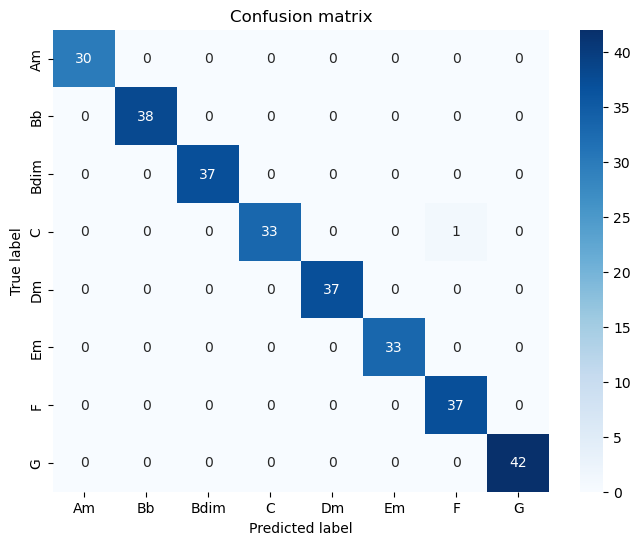

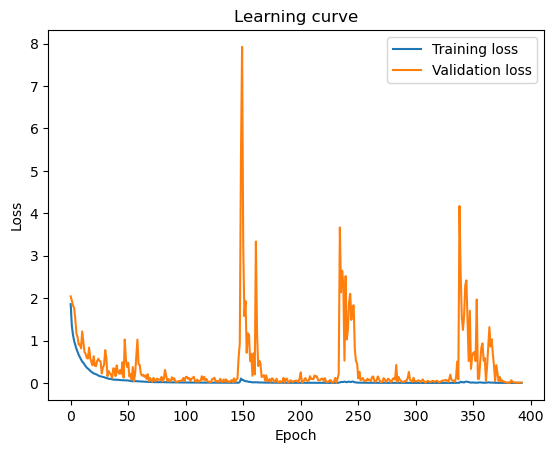

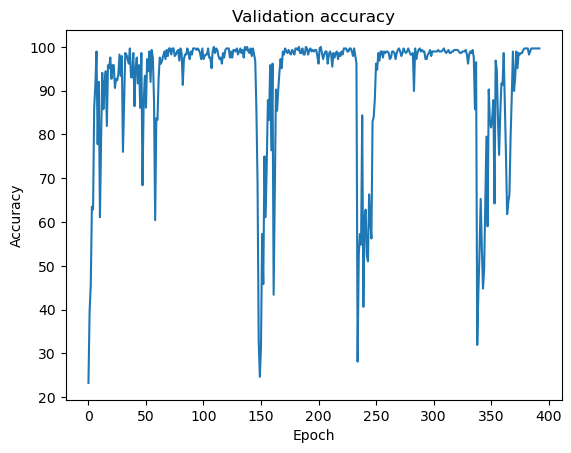

              precision    recall  f1-score   support

          Am       1.00      1.00      1.00        30
          Bb       1.00      1.00      1.00        38
        Bdim       1.00      1.00      1.00        37
           C       1.00      0.97      0.99        34
          Dm       1.00      1.00      1.00        37
          Em       1.00      1.00      1.00        33
           F       0.97      1.00      0.99        37
           G       1.00      1.00      1.00        42

    accuracy                           1.00       288
   macro avg       1.00      1.00      1.00       288
weighted avg       1.00      1.00      1.00       288



In [17]:
y_true_val = []
y_pred_val = []
model.eval()
with torch.no_grad():
    for data in val_loader:
        inputs, labels = data
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        y_true_val.extend(labels.numpy())
        y_pred_val.extend(predicted.numpy())

plot_confusion_matrix(y_true_val, y_pred_val, classes=['Am', 'Bb', 'Bdim', 'C', 'Dm', 'Em', 'F', 'G'])
plot_learning_curve(train_losses, val_losses)
plot_accuracy(accuracies)
print_classification_report(y_true_val, y_pred_val, classes=['Am', 'Bb', 'Bdim', 'C', 'Dm', 'Em', 'F', 'G'])

# Guitar chord classification model evaluation report

## Overview
This report presents the evaluation results of a machine learning model trained for guitar chord classification. The model was trained and evaluated on a dataset consisting of different guitar chords played in various styles and by different authors.

## Model performance metrics
The model's performance was evaluated using the following metrics:

### Precision, Recall, and F1-score
The precision, recall, and F1-score were computed for each class (guitar chord) in the dataset. These metrics provide insights into the model's ability to correctly classify instances of each class. 

The following table summarizes the precision, recall, and F1-score for each guitar chord class:

| Chord | Precision | Recall | F1-score |
|-------|-----------|--------|----------|
| Am    | 1.00      | 1.00   | 1.00     |
| Bb    | 1.00      | 1.00   | 1.00     |
| Bdim  | 1.00      | 1.00   | 1.00     |
| C     | 1.00      | 0.97   | 0.99     |
| Dm    | 1.00      | 1.00   | 1.00     |
| Em    | 1.00      | 1.00   | 1.00     |
| F     | 0.97      | 1.00   | 0.99     |
| G     | 1.00      | 1.00   | 1.00     |

### Accuracy
The overall accuracy of the model was computed, indicating the proportion of correctly classified instances over the total number of instances. The model achieved an accuracy of 1.00, indicating perfect overall classification performance.

## Conclusion
The evaluation results demonstrate that the trained model performs exceptionally well on the guitar chord classification task. It exhibits high precision, recall, and F1-score values across all chord classes, indicating that it has effectively learned the underlying patterns of the chords. 

The perfect accuracy further reinforces the model's reliability and generalization capability. These results suggest that the model can accurately classify guitar chords in various styles and by different authors, making it suitable for practical applications in music analysis and chord recognition tasks.

